In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

/home/barnali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
df = pd.read_csv('Rose.csv')
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [3]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [4]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [6]:
df.index

RangeIndex(start=0, stop=187, step=1)

In [7]:
df1.index

RangeIndex(start=0, stop=187, step=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


- interpolating missing values:

In [9]:
df2 = df.interpolate()

In [10]:
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [12]:
date = pd.date_range(start='1980', freq='MS',periods=len(df1))
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [13]:
df2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df2.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-01
1   1980-02  118.0 1980-02-01
2   1980-03  129.0 1980-03-01
3   1980-04   99.0 1980-04-01
4   1980-05  116.0 1980-05-01

In [14]:
df2.tail()

YearMonth  Rose Time_Stamp
182   1995-03  45.0 1995-03-01
183   1995-04  52.0 1995-04-01
184   1995-05  28.0 1995-05-01
185   1995-06  40.0 1995-06-01
186   1995-07  62.0 1995-07-01

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Rose        187 non-null    float64       
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


In [16]:
df1['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df1.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-01
1   1980-02       1591 1980-02-01
2   1980-03       2304 1980-03-01
3   1980-04       1712 1980-04-01
4   1980-05       1471 1980-05-01

In [17]:
df1.tail()

YearMonth  Sparkling Time_Stamp
182   1995-03       1897 1995-03-01
183   1995-04       1862 1995-04-01
184   1995-05       1670 1995-05-01
185   1995-06       1688 1995-06-01
186   1995-07       2031 1995-07-01

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Sparkling   187 non-null    int64         
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [19]:
df2.set_index(keys='Time_Stamp',drop=True,inplace=True)
df2.drop(labels='YearMonth', axis=1, inplace=True)
df2.head()

Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [20]:
df2.tail()

Rose
Time_Stamp      
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [22]:
df1.set_index(keys='Time_Stamp',drop=True,inplace=True)
df1.drop(labels='YearMonth', axis=1, inplace=True)
df1.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

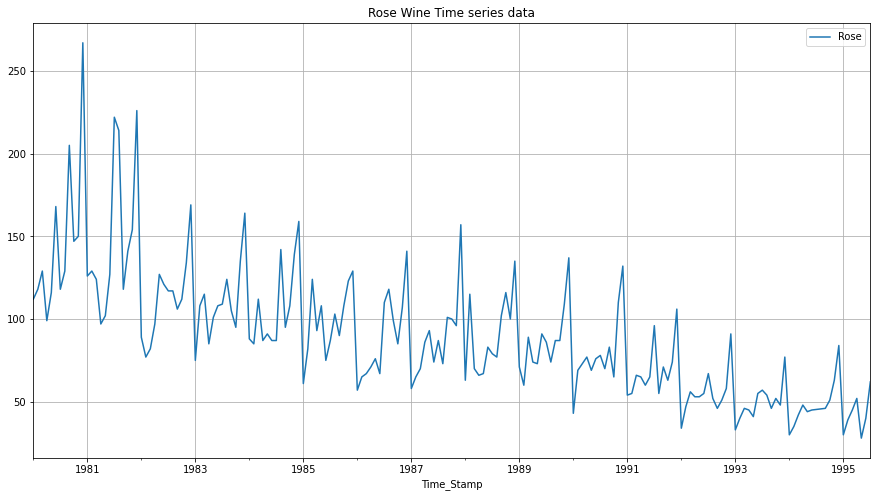

In [25]:
df2.plot(grid=True) #title('Rose Wine Time series data'))
plt.title('Rose Wine Time series data');

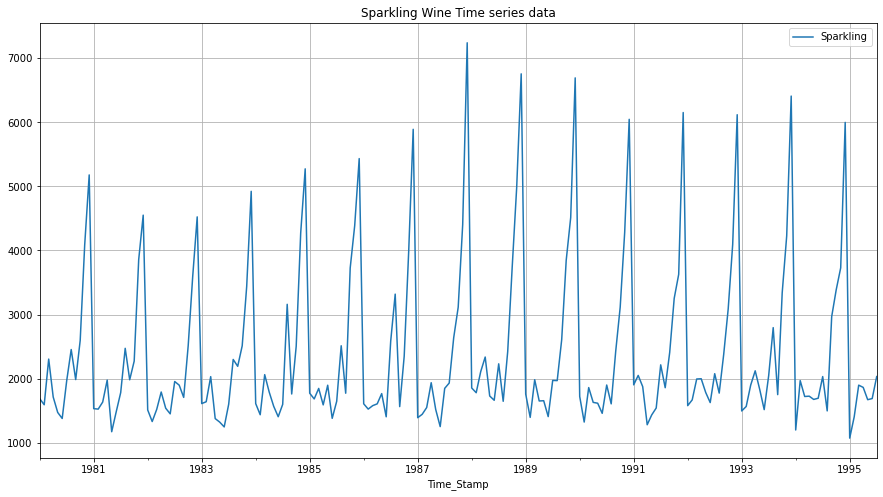

In [26]:
df1.plot(grid=True);
plt.title('Sparkling Wine Time series data');

In [27]:
round(df2.describe(),3)

Rose
count  187.000
mean    89.914
std     39.238
min     28.000
25%     62.500
50%     85.000
75%    111.000
max    267.000

In [28]:
round(df1.describe(),3)

Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000

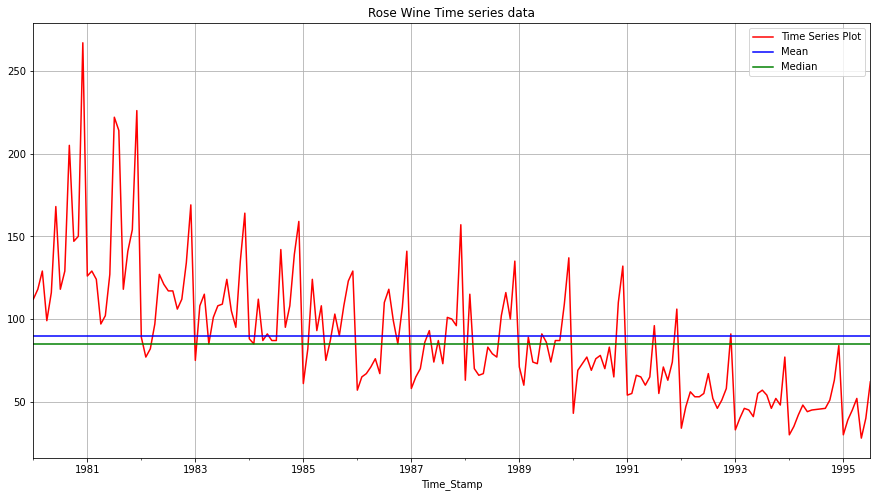

In [29]:
df2.plot(color='Red')
plt.axhline(df2['Rose'].mean(),color='Blue')
plt.axhline(df2['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.title('Rose Wine Time series data');

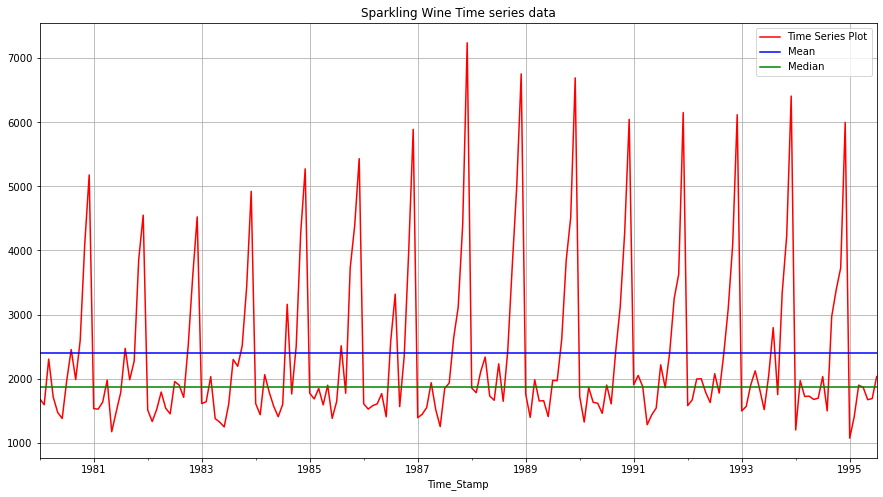

In [30]:
df1.plot(color='Red')
plt.axhline(df1['Sparkling'].mean(),color='Blue')
plt.axhline(df1['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.title('Sparkling Wine Time series data');

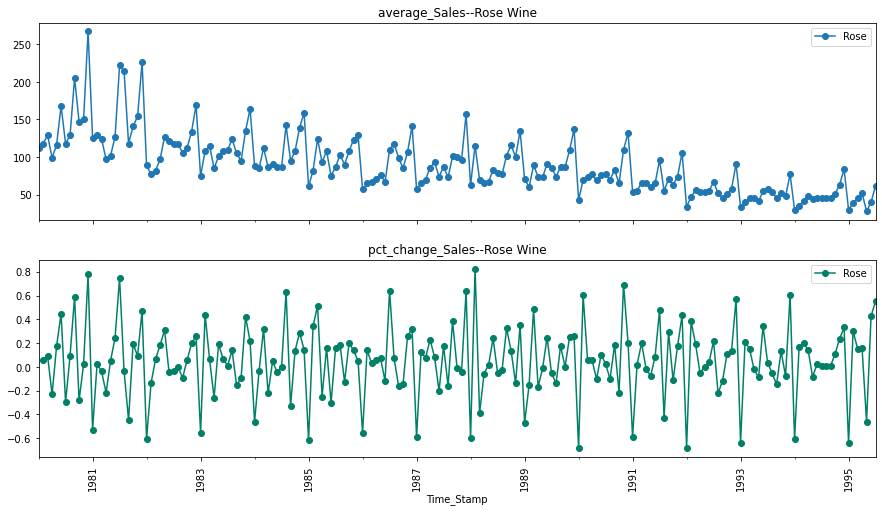

In [31]:
# group by date and get average Customers, and precent change
average_Sales    = df2.groupby(df2.index)["Rose"].mean()
pct_change_Sales = df2.groupby(df2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average CO2-ppm over time(year-month)
ax1 = average_Sales.plot(legend=True,ax=axis1,marker='o',title="average_Sales--Rose Wine")

ax1.set_xticks(range(len(average_Sales)))
ax1.set_xticklabels(average_Sales.index.tolist(), rotation=90)

# plot precent change for CO2-ppm over time(year-month)
ax2 = pct_change_Sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_Sales--Rose Wine")

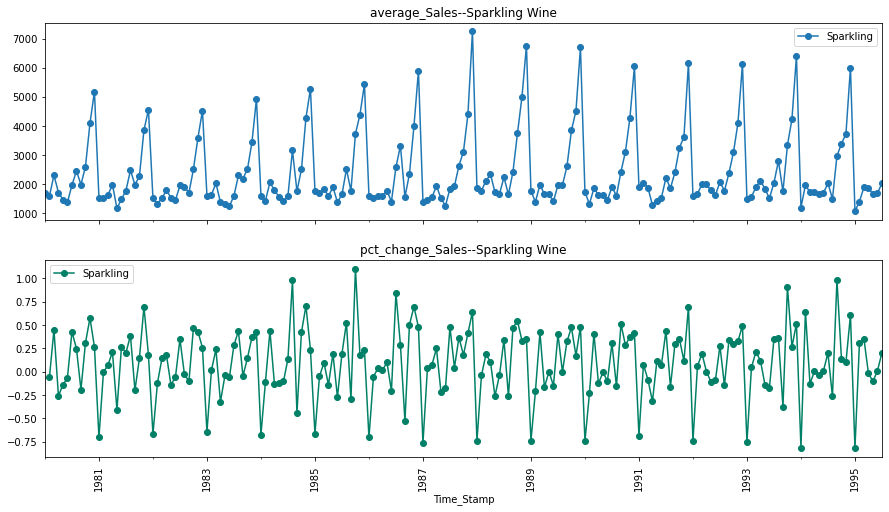

In [32]:
# group by date and get average Customers, and precent change
average_Sales    = df1.groupby(df1.index)["Sparkling"].mean()
pct_change_Sales = df1.groupby(df1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average CO2-ppm over time(year-month)
ax1 = average_Sales.plot(legend=True,ax=axis1,marker='o',title="average_Sales--Sparkling Wine")

ax1.set_xticks(range(len(average_Sales)))
ax1.set_xticklabels(average_Sales.index.tolist(), rotation=90)

# plot precent change for CO2-ppm over time(year-month)
ax2 = pct_change_Sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_Sales--Sparkling Wine")

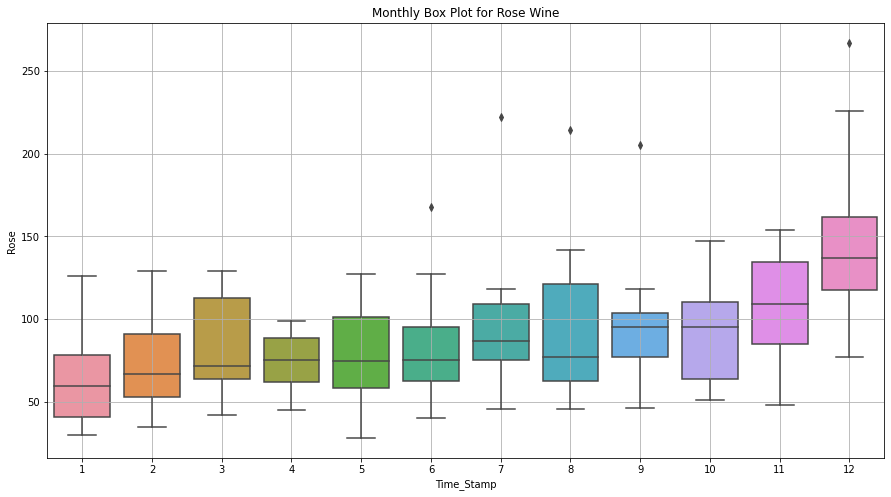

In [33]:
sns.boxplot(x=df2.index.month,y=df2['Rose'])
plt.grid();
plt.title('Monthly Box Plot for Rose Wine');

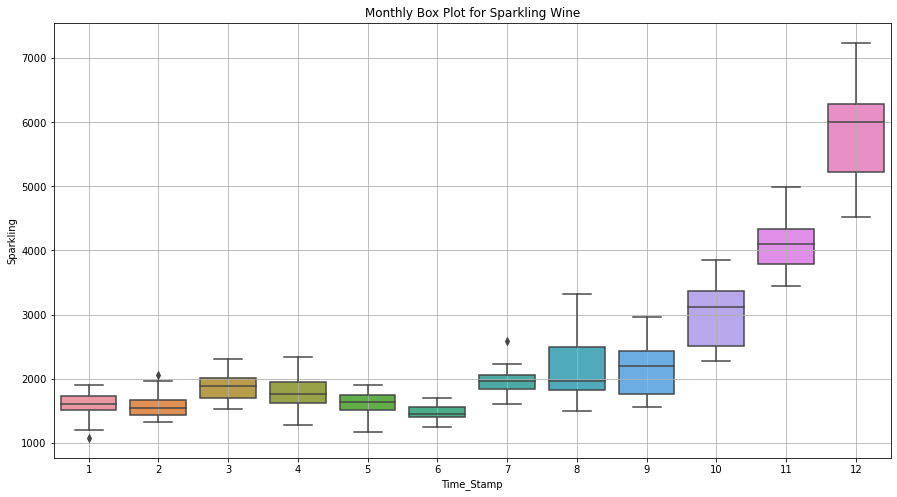

In [34]:
sns.boxplot(x=df1.index.month,y=df1['Sparkling'])
plt.grid();
plt.title('Monthly Box Plot for Sparkling Wine');

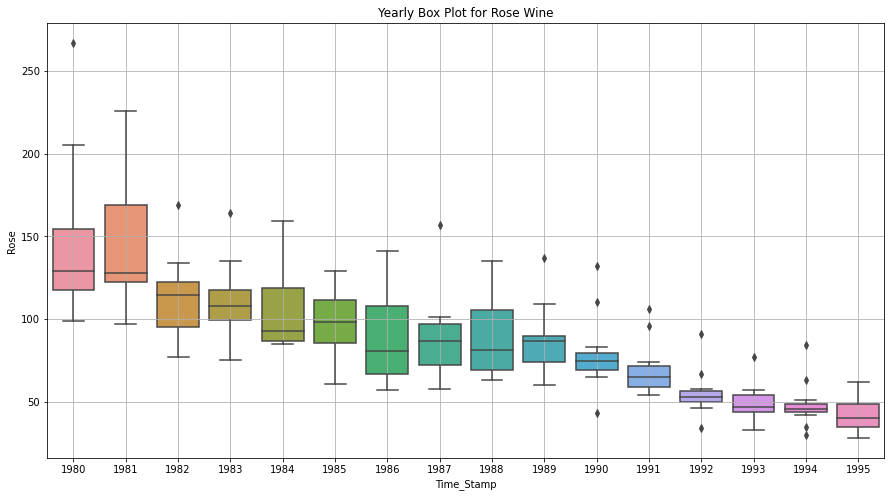

In [35]:
sns.boxplot(x=df2.index.year,y=df2['Rose'])
plt.grid();
plt.title('Yearly Box Plot for Rose Wine');

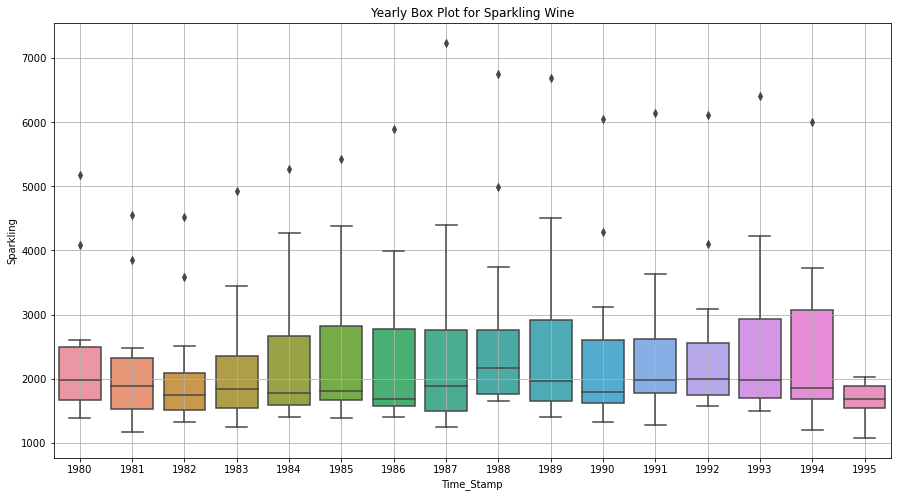

In [36]:
sns.boxplot(x=df1.index.year,y=df1['Sparkling'])
plt.grid();
plt.title('Yearly Box Plot for Sparkling Wine');

In [37]:
monthly_Sales_across_years = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month_name(), index = df2.index.year)
monthly_Sales_across_years

Time_Stamp  April      August  December  February  January        July   June  \
Time_Stamp                                                                      
1980         99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981         97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982         97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983         85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984         87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985         93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986         71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987         86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988         66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989         74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990         77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991         65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992         53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993         45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994         48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995         52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

Time_Stamp  March    May  November  October  September  
Time_Stamp                                              
1980        129.0  116.0     150.0    147.0      205.0  
1981        124.0  102.0     154.0    141.0      118.0  
1982         82.0  127.0     134.0    112.0      106.0  
1983        115.0  101.0     135.0     95.0      105.0  
1984        112.0   91.0     139.0    108.0       95.0  
1985        124.0  108.0     123.0    108.0       90.0  
1986         67.0   76.0     107.0     85.0       99.0  
1987         70.0   93.0      96.0    100.0      101.0  
1988         70.0   67.0     100.0    116.0      102.0  
1989         89.0   73.0     109.0     87.0       87.0  
1990         73.0   69.0     110.0     65.0       83.0  
1991         66.0   60.0      74.0     63.0       71.0  
1992         56.0   53.0      58.0     51.0       46.0  
1993         46.0   41.0      48.0     52.0       46.0  
1994         42.0   44.0      63.0     51.0       46.0  
1995         45.0   28.0       NaN      NaN        NaN

In [38]:
monthly_Sales_across_years1 = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
monthly_Sales_across_years1

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

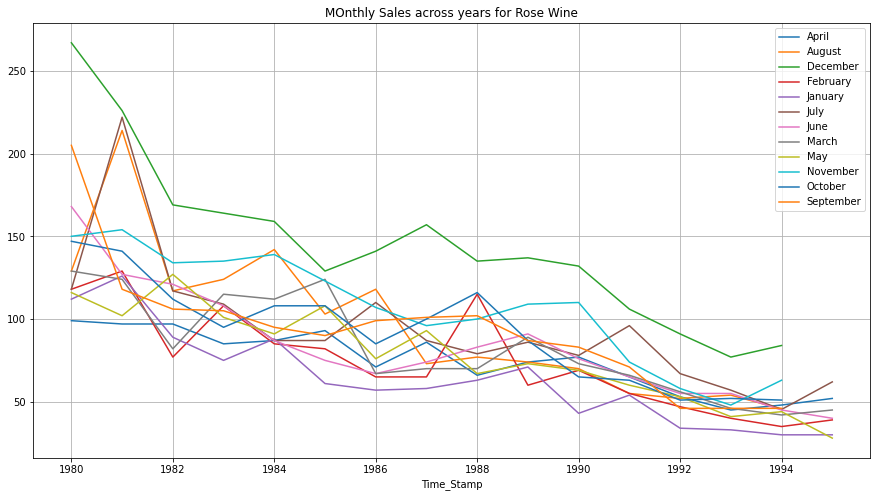

In [39]:
monthly_Sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
plt.title('MOnthly Sales across years for Rose Wine');

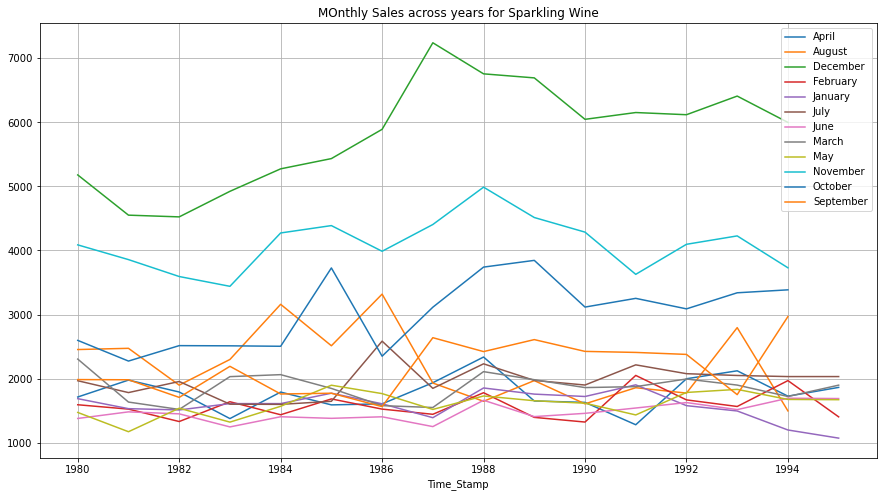

In [40]:
monthly_Sales_across_years1.plot()
plt.grid()
plt.legend(loc='best');
plt.title('MOnthly Sales across years for Sparkling Wine');

In [41]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

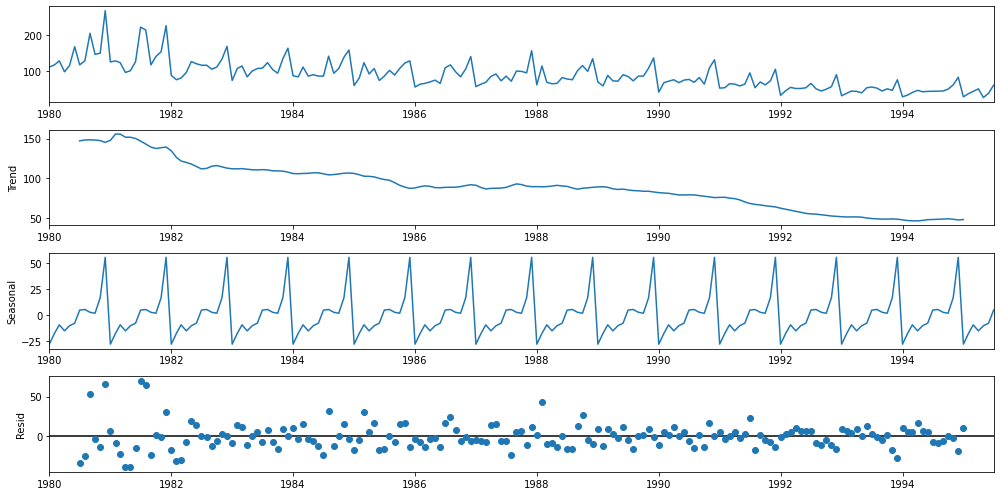

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df2,model='additive')
decomposition.plot();


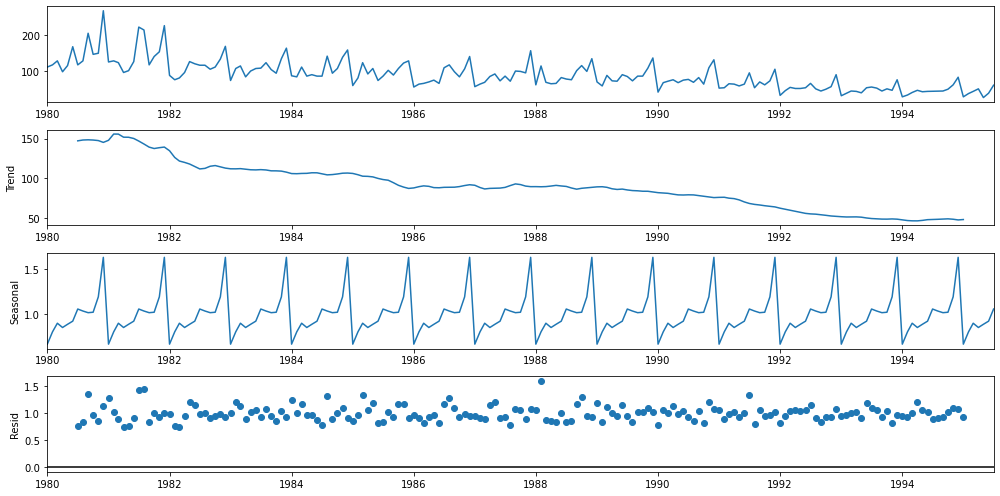

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df2,model='multiplicative')
decomposition.plot();

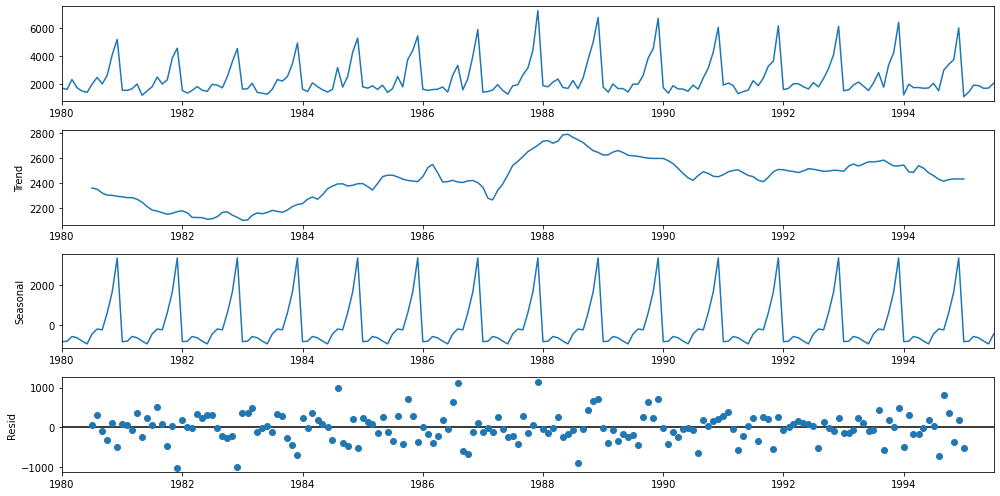

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

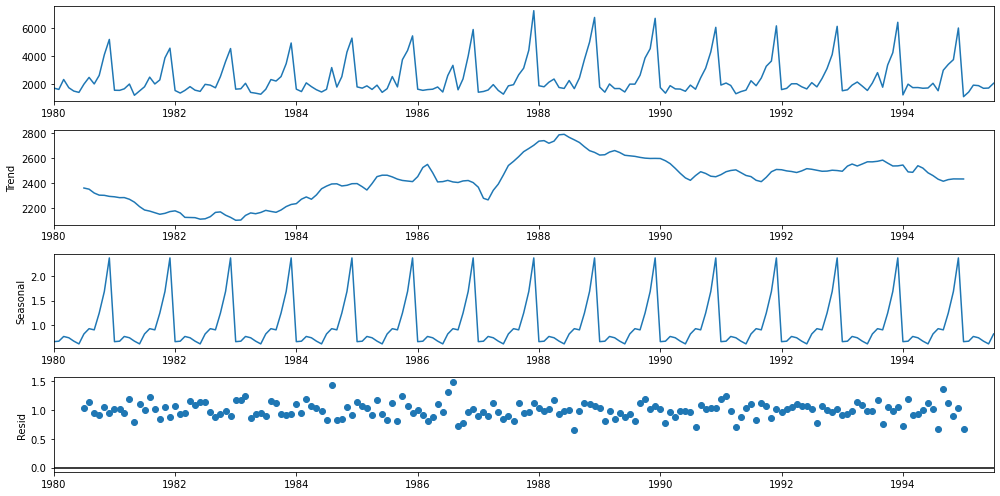

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

### Split the data into training and test. The data from 1991 should be test data.

In [46]:
train             = df2[df2.index<'1991'] 
test              = df2[df2.index>'1991']

In [47]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

[132 rows x 1 columns]

Test Data


Rose
Time_Stamp            
1991-02-01   55.000000
1991-03-01   66.000000
1991-04-01   65.000000
1991-05-01   60.000000
1991-06-01   65.000000
1991-07-01   96.000000
1991-08-01   55.000000
1991-09-01   71.000000
1991-10-01   63.000000
1991-11-01   74.000000
1991-12-01  106.000000
1992-01-01   34.000000
1992-02-01   47.000000
1992-03-01   56.000000
1992-04-01   53.000000
1992-05-01   53.000000
1992-06-01   55.000000
1992-07-01   67.000000
1992-08-01   52.000000
1992-09-01   46.000000
1992-10-01   51.000000
1992-11-01   58.000000
1992-12-01   91.000000
1993-01-01   33.000000
1993-02-01   40.000000
1993-03-01   46.000000
1993-04-01   45.000000
1993-05-01   41.000000
1993-06-01   55.000000
1993-07-01   57.000000
1993-08-01   54.000000
1993-09-01   46.000000
1993-10-01   52.000000
1993-11-01   48.000000
1993-12-01   77.000000
1994-01-01   30.000000
1994-02-01   35.000000
1994-03-01   42.000000
1994-04-01   48.000000
1994-05-01   44.000000
1994-06-01   45.000000
1994-07-01   45.333333
1994-08-01   45.666667
1994-09-01   46.000000
1994-10-01   51.000000
1994-11-01   63.000000
1994-12-01   84.000000
1995-01-01   30.000000
1995-02-01   39.000000
1995-03-01   45.000000
1995-04-01   52.000000
1995-05-01   28.000000
1995-06-01   40.000000
1995-07-01   62.000000

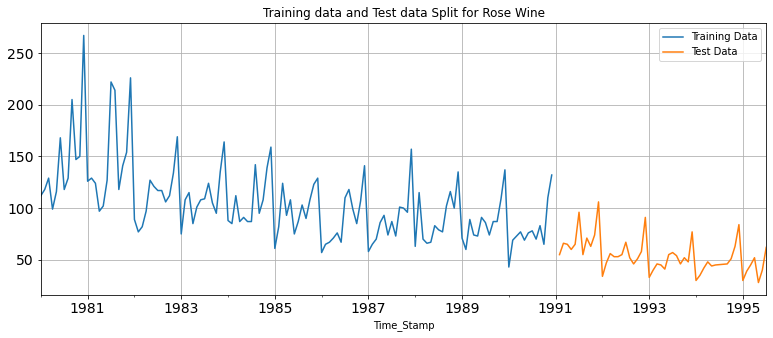

In [48]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Training data and Test data Split for Rose Wine')
plt.show()

In [49]:
train1             = df1[df1.index<'1991'] 
test1             = df1[df1.index>'1991']

In [50]:
print(train.shape)
print(test.shape)

(132, 1)
(54, 1)


In [51]:
print(train1.shape)
print(test1.shape)

(132, 1)
(54, 1)


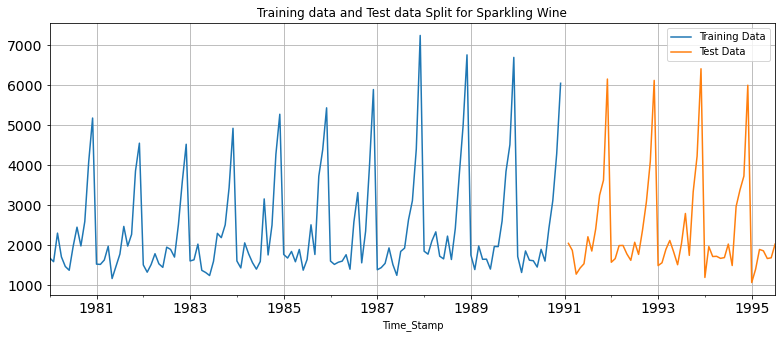

In [52]:
train1['Sparkling'].plot(figsize=(13,5), fontsize=14)
test1['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Training data and Test data Split for Sparkling Wine')
plt.show()

### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [53]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [54]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [55]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [56]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [57]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104992
1991-02-01    87.104992
1991-03-01    87.104992
1991-04-01    87.104992
1991-05-01    87.104992
1991-06-01    87.104992
1991-07-01    87.104992
1991-08-01    87.104992
1991-09-01    87.104992
1991-10-01    87.104992
1991-11-01    87.104992
1991-12-01    87.104992
1992-01-01    87.104992
1992-02-01    87.104992
1992-03-01    87.104992
1992-04-01    87.104992
1992-05-01    87.104992
1992-06-01    87.104992
1992-07-01    87.104992
1992-08-01    87.104992
1992-09-01    87.104992
1992-10-01    87.104992
1992-11-01    87.104992
1992-12-01    87.104992
1993-01-01    87.104992
1993-02-01    87.104992
1993-03-01    87.104992
1993-04-01    87.104992
1993-05-01    87.104992
1993-06-01    87.104992
1993-07-01    87.104992
1993-08-01    87.104992
1993-09-01    87.104992
1993-10-01    87.104992
1993-11-01    87.104992
1993-12-01    87.104992
1994-01-01    87.104992
1994-02-01    87.104992
1994-03-01    87.104992
1994-04-01    87.104992
1994-05-01    87.104992
1994-06-01    87

#### For Sparkling wine:

In [58]:
model_SES1 = SimpleExpSmoothing(train1,initialization_method='heuristic')

In [59]:
model_SES_autofit1 = model_SES1.fit(optimized=True)

In [60]:
model_SES_autofit1.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
# Using the fitted model on the training set to forecast on the test set
SES_predict1 = model_SES_autofit1.forecast(steps=len(test1))
SES_predict1

1991-01-01    2804.650301
1991-02-01    2804.650301
1991-03-01    2804.650301
1991-04-01    2804.650301
1991-05-01    2804.650301
1991-06-01    2804.650301
1991-07-01    2804.650301
1991-08-01    2804.650301
1991-09-01    2804.650301
1991-10-01    2804.650301
1991-11-01    2804.650301
1991-12-01    2804.650301
1992-01-01    2804.650301
1992-02-01    2804.650301
1992-03-01    2804.650301
1992-04-01    2804.650301
1992-05-01    2804.650301
1992-06-01    2804.650301
1992-07-01    2804.650301
1992-08-01    2804.650301
1992-09-01    2804.650301
1992-10-01    2804.650301
1992-11-01    2804.650301
1992-12-01    2804.650301
1993-01-01    2804.650301
1993-02-01    2804.650301
1993-03-01    2804.650301
1993-04-01    2804.650301
1993-05-01    2804.650301
1993-06-01    2804.650301
1993-07-01    2804.650301
1993-08-01    2804.650301
1993-09-01    2804.650301
1993-10-01    2804.650301
1993-11-01    2804.650301
1993-12-01    2804.650301
1994-01-01    2804.650301
1994-02-01    2804.650301
1994-03-01  

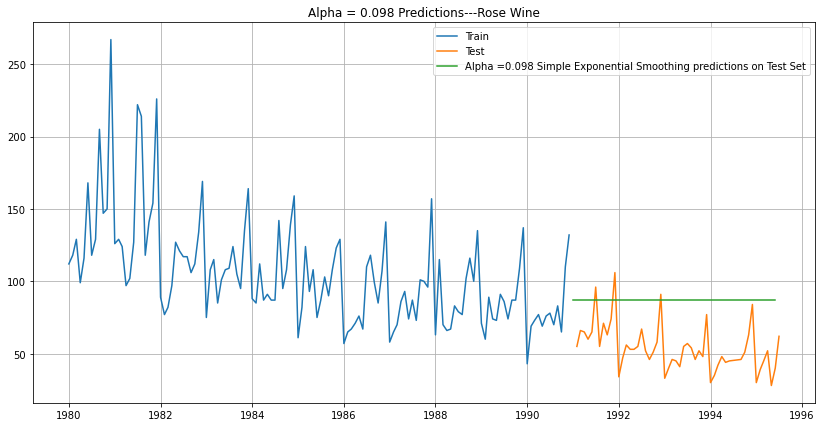

In [62]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions---Rose Wine');

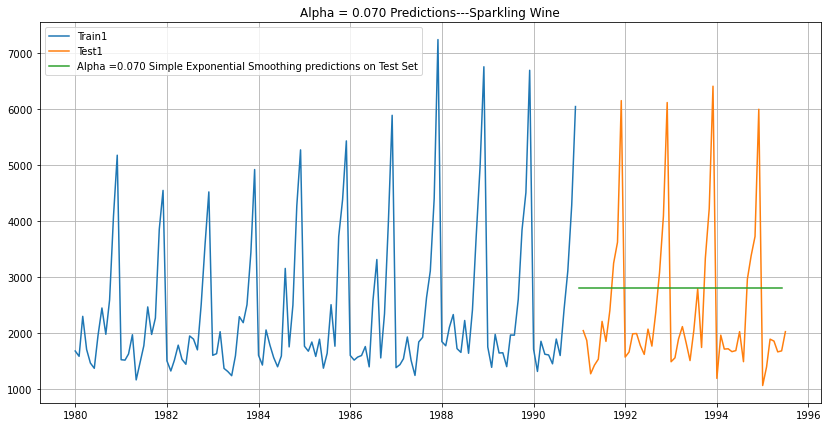

In [63]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train1, label='Train1')
plt.plot(test1, label='Test1')

plt.plot(SES_predict1, label='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.070 Predictions---Sparkling Wine');

#### For Rose Wine:

In [64]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [65]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.861106175075626
SES RMSE (calculated using statsmodels): 36.861106175075626


#### for Sparkling wine:

In [66]:
print('SES RMSE:',mean_squared_error(test1.values,SES_predict1.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test1.values,SES_predict1.values)[0])

SES RMSE: 1344.7343754617889
SES RMSE (calculated using statsmodels): 1344.7343754617889


#### For Rose Wine:

In [67]:
resultsDf = pd.DataFrame({'Test RMSE--Rose': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.098,SES'])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES        36.861106

#### For Sparkling Wine:

In [68]:
resultsDf1 = pd.DataFrame({'Test RMSE--Sparkling': [em.rmse(test1.values,SES_predict1.values)[0]]},index=['Alpha=0.070,SES'])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES           1344.734375

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

### For Rose wine:

In [69]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train, exponential = False, initialization_method='heuristic')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [70]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.063269
1991-02-01    71.568892
1991-03-01    71.074514
1991-04-01    70.580136
1991-05-01    70.085758
1991-06-01    69.591381
1991-07-01    69.097003
1991-08-01    68.602625
1991-09-01    68.108247
1991-10-01    67.613870
1991-11-01    67.119492
1991-12-01    66.625114
1992-01-01    66.130736
1992-02-01    65.636358
1992-03-01    65.141981
1992-04-01    64.647603
1992-05-01    64.153225
1992-06-01    63.658847
1992-07-01    63.164470
1992-08-01    62.670092
1992-09-01    62.175714
1992-10-01    61.681336
1992-11-01    61.186959
1992-12-01    60.692581
1993-01-01    60.198203
1993-02-01    59.703825
1993-03-01    59.209447
1993-04-01    58.715070
1993-05-01    58.220692
1993-06-01    57.726314
1993-07-01    57.231936
1993-08-01    56.737559
1993-09-01    56.243181
1993-10-01    55.748803
1993-11-01    55.254425
1993-12-01    54.760047
1994-01-01    54.265670
1994-02-01    53.771292
1994-03-01    53.276914
1994-04-01    52.782536
1994-05-01    52.288159
1994-06-01    51

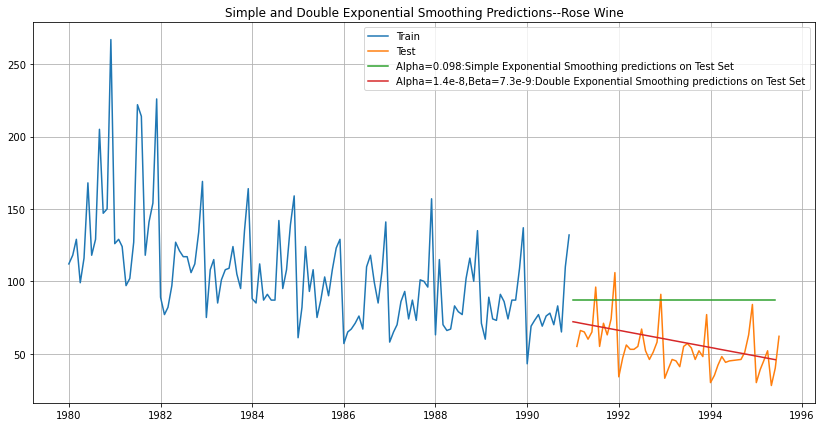

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.4e-8,Beta=7.3e-9:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions--Rose Wine');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [72]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.36960474025116


In [73]:
resultsDf_temp = pd.DataFrame({'Test RMSE--Rose': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.4e-8,Beta=7.3e-9:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES                     36.861106
Alpha=1.4e-8,Beta=7.3e-9:DES        15.369605

### Inference- Rose wine

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

### For Sparkling Wine:

In [74]:
# Initializing the Double Exponential Smoothing Model
model_DES1 = Holt(train1, exponential = False, initialization_method='known', initial_level=1, 
                  initial_trend=1)
# Fitting the model
model_DES1 = model_DES1.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES1.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1.0, 'initial_trend': 1.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [75]:
# Forecasting using this model for the duration of the test set
DES_predict1 =  model_DES1.forecast(len(test1))
DES_predict1

1991-01-01    5292.314865
1991-02-01    5293.827657
1991-03-01    5295.340450
1991-04-01    5296.853242
1991-05-01    5298.366035
1991-06-01    5299.878827
1991-07-01    5301.391620
1991-08-01    5302.904412
1991-09-01    5304.417205
1991-10-01    5305.929997
1991-11-01    5307.442790
1991-12-01    5308.955582
1992-01-01    5310.468375
1992-02-01    5311.981167
1992-03-01    5313.493959
1992-04-01    5315.006752
1992-05-01    5316.519544
1992-06-01    5318.032337
1992-07-01    5319.545129
1992-08-01    5321.057922
1992-09-01    5322.570714
1992-10-01    5324.083507
1992-11-01    5325.596299
1992-12-01    5327.109092
1993-01-01    5328.621884
1993-02-01    5330.134677
1993-03-01    5331.647469
1993-04-01    5333.160262
1993-05-01    5334.673054
1993-06-01    5336.185847
1993-07-01    5337.698639
1993-08-01    5339.211431
1993-09-01    5340.724224
1993-10-01    5342.237016
1993-11-01    5343.749809
1993-12-01    5345.262601
1994-01-01    5346.775394
1994-02-01    5348.288186
1994-03-01  

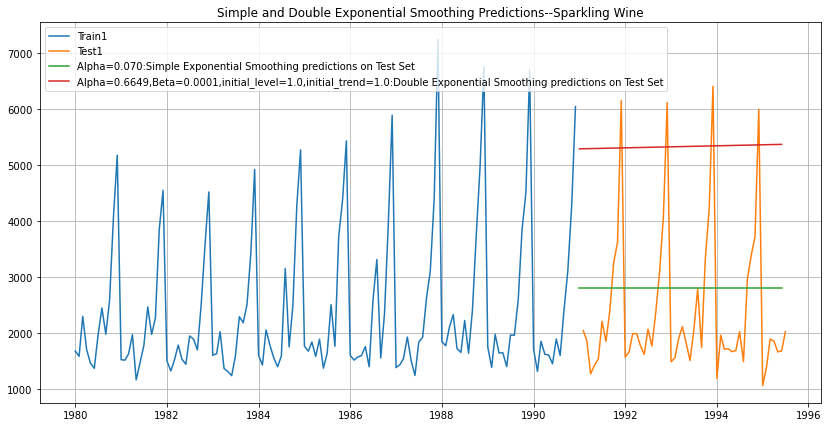

In [76]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train1, label='Train1')
plt.plot(test1, label='Test1')

plt.plot(SES_predict1, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.6649,Beta=0.0001,initial_level=1.0,initial_trend=1.0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions--Sparkling Wine');

In [77]:
print('DES RMSE1:',mean_squared_error(test1.values,DES_predict1.values,squared=False))

DES RMSE1: 3193.8635766929638


In [78]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE--Sparkling': [mean_squared_error(test1.values,DES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.6649,Beta=0.0001,initial_level=1.0,initial_trend=1.0:DES'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp1])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES                                              1344.734375
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577

#### Double Exponential Smoothing for Sparkling Wine:

In [79]:
# Initializing the Double Exponential Smoothing Model
model_DES2 = ExponentialSmoothing(train1,trend='additive',seasonal=None, initialization_method='known', 
                                  initial_level=1, initial_trend=1,)
# Fitting the model
model_DES2 = model_DES2.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES2.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1.0, 'initial_trend': 1.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [80]:
# Forecasting using this model for the duration of the test set
DES_predict2 =  model_DES2.forecast(len(test1))
DES_predict2

1991-01-01    5292.314865
1991-02-01    5293.827657
1991-03-01    5295.340450
1991-04-01    5296.853242
1991-05-01    5298.366035
1991-06-01    5299.878827
1991-07-01    5301.391620
1991-08-01    5302.904412
1991-09-01    5304.417205
1991-10-01    5305.929997
1991-11-01    5307.442790
1991-12-01    5308.955582
1992-01-01    5310.468375
1992-02-01    5311.981167
1992-03-01    5313.493959
1992-04-01    5315.006752
1992-05-01    5316.519544
1992-06-01    5318.032337
1992-07-01    5319.545129
1992-08-01    5321.057922
1992-09-01    5322.570714
1992-10-01    5324.083507
1992-11-01    5325.596299
1992-12-01    5327.109092
1993-01-01    5328.621884
1993-02-01    5330.134677
1993-03-01    5331.647469
1993-04-01    5333.160262
1993-05-01    5334.673054
1993-06-01    5336.185847
1993-07-01    5337.698639
1993-08-01    5339.211431
1993-09-01    5340.724224
1993-10-01    5342.237016
1993-11-01    5343.749809
1993-12-01    5345.262601
1994-01-01    5346.775394
1994-02-01    5348.288186
1994-03-01  

#### Triple Exponential Smoothing for Rose Wine:

In [81]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [82]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     42.716117
1991-02-01     54.528923
1991-03-01     61.968476
1991-04-01     50.782306
1991-05-01     59.046436
1991-06-01     63.984756
1991-07-01     73.284643
1991-08-01     78.885632
1991-09-01     74.336035
1991-10-01     71.904228
1991-11-01     89.445446
1991-12-01    131.087464
1992-01-01     36.158278
1992-02-01     47.971084
1992-03-01     55.410637
1992-04-01     44.224467
1992-05-01     52.488597
1992-06-01     57.426917
1992-07-01     66.726804
1992-08-01     72.327793
1992-09-01     67.778196
1992-10-01     65.346389
1992-11-01     82.887606
1992-12-01    124.529625
1993-01-01     29.600439
1993-02-01     41.413245
1993-03-01     48.852798
1993-04-01     37.666628
1993-05-01     45.930758
1993-06-01     50.869078
1993-07-01     60.168965
1993-08-01     65.769954
1993-09-01     61.220357
1993-10-01     58.788550
1993-11-01     76.329767
1993-12-01    117.971785
1994-01-01     23.042600
1994-02-01     34.855406
1994-03-01     42.294959
1994-04-01     31.108789


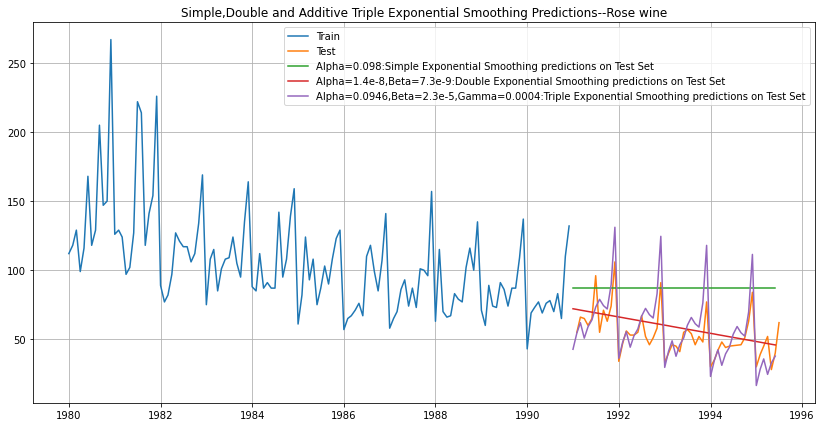

In [83]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.4e-8,Beta=7.3e-9:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Additive Triple Exponential Smoothing Predictions--Rose wine');

In [84]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 27.110218166779763


In [85]:
resultsDf_temp = pd.DataFrame({'Test RMSE--Rose': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES                                      36.861106
Alpha=1.4e-8,Beta=7.3e-9:DES                         15.369605
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add        27.110218

#### Triple Exponential Smoothing for Rose Wine- Multiplicative 

In [86]:
# Initializing the Double Exponential Smoothing Model
model_TES3 = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES3 = model_TES3.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES3.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.04987589102863182, 'smoothing_trend': 0.04062836597595887, 'smoothing_seasonal': 0.0007872538153684354, 'damping_trend': nan, 'initial_level': 111.17280748014831, 'initial_trend': 0.9922029403878698, 'initial_seasons': array([1.02459074, 1.16254604, 1.27236105, 1.11087077, 1.24979439,
       1.36076526, 1.49445559, 1.59212574, 1.51181689, 1.47785382,
       1.72383765, 2.37351566]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [87]:
# Forecasting using this model for the duration of the test set
TES_predict3 =  model_TES3.forecast(len(test))
TES_predict3

1991-01-01     56.228831
1991-02-01     63.659988
1991-03-01     69.486365
1991-04-01     60.525715
1991-05-01     67.894957
1991-06-01     73.699560
1991-07-01     80.734988
1991-08-01     85.777107
1991-09-01     81.261357
1991-10-01     79.236411
1991-11-01     92.191315
1991-12-01    126.561298
1992-01-01     54.493088
1992-02-01     61.694850
1992-03-01     67.341370
1992-04-01     58.657330
1992-05-01     65.799088
1992-06-01     71.424507
1992-07-01     78.242757
1992-08-01     83.129229
1992-09-01     78.752877
1992-10-01     76.790440
1992-11-01     89.345435
1992-12-01    122.654441
1993-01-01     52.810925
1993-02-01     59.790374
1993-03-01     65.262590
1993-04-01     56.846620
1993-05-01     63.767917
1993-06-01     69.219684
1993-07-01     75.827458
1993-08-01     80.563089
1993-09-01     76.321832
1993-10-01     74.419974
1993-11-01     86.587405
1993-12-01    118.868186
1994-01-01     51.180689
1994-02-01     57.944687
1994-03-01     63.247981
1994-04-01     55.091805


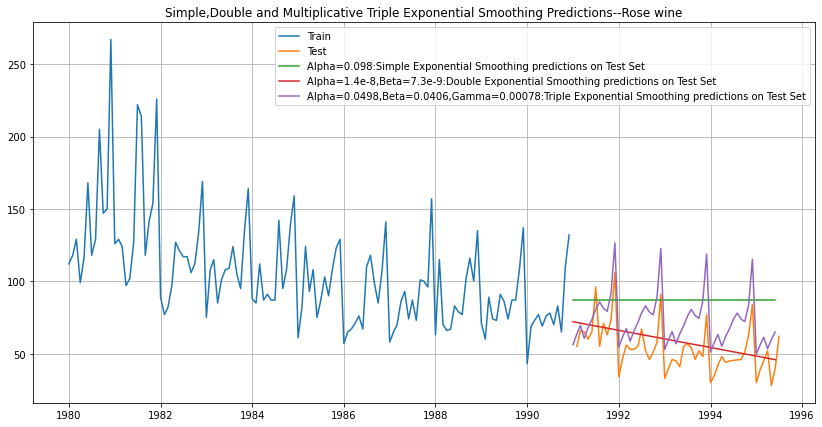

In [88]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.4e-8,Beta=7.3e-9:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict3, label='Alpha=0.0498,Beta=0.0406,Gamma=0.00078:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Multiplicative Triple Exponential Smoothing Predictions--Rose wine');

In [89]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict3.values,squared=False))

TES RMSE: 29.530500128674603


In [90]:
resultsDf_temp3 = pd.DataFrame({'Test RMSE--Rose': [mean_squared_error(test.values,TES_predict3.values,squared=False)]}
                           ,index=['Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul'])

resultsDf = pd.concat([resultsDf, resultsDf_temp3])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES                                       36.861106
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500

#### Triple Exponential Smoothing for Sparkling Wine:
trend and seasonality = additive

In [91]:
# Initializing the Double Exponential Smoothing Model
model_TES1 = ExponentialSmoothing(train1,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES1 = model_TES1.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES1.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217693511166, 'smoothing_trend': 0.012360783126182025, 'smoothing_seasonal': 0.4607177659431463, 'damping_trend': nan, 'initial_level': 2356.5783078812697, 'initial_trend': -0.018442178724720648, 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
       -808.42502897, -815.35019273, -384.23061339,   72.99513671,
       -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [92]:
# Forecasting using this model for the duration of the test set
TES_predict1 =  model_TES1.forecast(len(test1))
TES_predict1

1991-01-01    1490.574618
1991-02-01    1204.714535
1991-03-01    1688.941336
1991-04-01    1551.451059
1991-05-01    1461.440697
1991-06-01    1278.907452
1991-07-01    1805.164331
1991-08-01    1679.251719
1991-09-01    2315.687997
1991-10-01    3225.309274
1991-11-01    4299.652749
1991-12-01    6411.161831
1992-01-01    1483.297096
1992-02-01    1197.437013
1992-03-01    1681.663814
1992-04-01    1544.173537
1992-05-01    1454.163175
1992-06-01    1271.629930
1992-07-01    1797.886809
1992-08-01    1671.974197
1992-09-01    2308.410475
1992-10-01    3218.031752
1992-11-01    4292.375227
1992-12-01    6403.884309
1993-01-01    1476.019574
1993-02-01    1190.159491
1993-03-01    1674.386292
1993-04-01    1536.896015
1993-05-01    1446.885653
1993-06-01    1264.352408
1993-07-01    1790.609287
1993-08-01    1664.696675
1993-09-01    2301.132953
1993-10-01    3210.754230
1993-11-01    4285.097705
1993-12-01    6396.606787
1994-01-01    1468.742052
1994-02-01    1182.881969
1994-03-01  

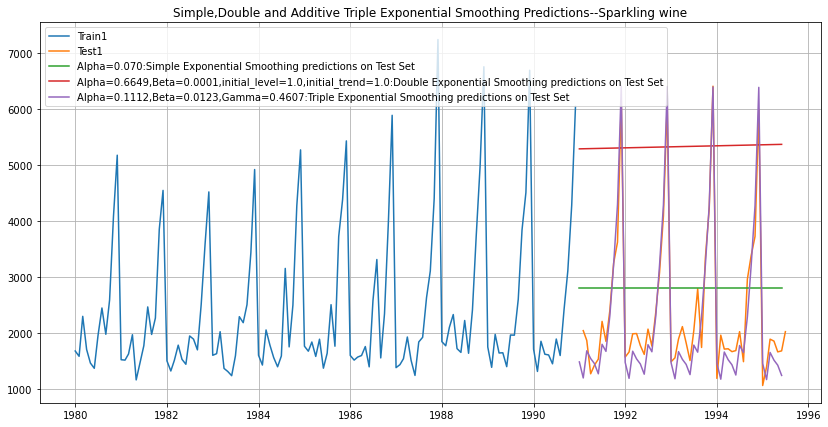

In [93]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train1, label='Train1')
plt.plot(test1, label='Test1')

plt.plot(SES_predict1, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.6649,Beta=0.0001,initial_level=1.0,initial_trend=1.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict1, label='Alpha=0.1112,Beta=0.0123,Gamma=0.4607:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Additive Triple Exponential Smoothing Predictions--Sparkling wine');

In [94]:
print('TES RMSE1:',mean_squared_error(test1.values,TES_predict1.values,squared=False))

TES RMSE1: 1575.981106491285


In [95]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE--Sparkling': [mean_squared_error(test1.values,TES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp1])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES                                              1344.734375
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106

#### Triple Exponential Smoothing for Sparkling Wine:

trend and seasonality = multiplicative

In [96]:
# Initializing the Double Exponential Smoothing Model
model_TES2 = ExponentialSmoothing(train1,trend='multiplicative',seasonal='multiplicative',
                                  initialization_method='estimated') # initial_level=0.01, initial_trend=0.01, 
                                  #initial_seasonal=0.01)
# Fitting the model
model_TES2 = model_TES2.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES2.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107068619440803, 'smoothing_trend': 0.049364277175342766, 'smoothing_seasonal': 0.36216155292352714, 'damping_trend': nan, 'initial_level': 2356.529810158899, 'initial_trend': 0.9986312323184912, 'initial_seasons': array([0.71947969, 0.69883147, 0.90054243, 0.81033279, 0.66897802,
       0.66976274, 0.87942872, 1.11688229, 0.90007942, 1.17672321,
       1.83838251, 2.34601867]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [97]:
# Forecasting using this model for the duration of the test set
TES_predict2 =  model_TES2.forecast(len(test1))
TES_predict2

1991-01-01    1591.323941
1991-02-01    1360.442206
1991-03-01    1767.962324
1991-04-01    1661.642323
1991-05-01    1547.433163
1991-06-01    1360.458913
1991-07-01    1862.027852
1991-08-01    1829.446986
1991-09-01    2287.021578
1991-10-01    3136.780700
1991-11-01    4149.690115
1991-12-01    5926.617675
1992-01-01    1548.566077
1992-02-01    1323.887989
1992-03-01    1720.458299
1992-04-01    1616.995049
1992-05-01    1505.854617
1992-06-01    1323.904246
1992-07-01    1811.996347
1992-08-01    1780.290907
1992-09-01    2225.570761
1992-10-01    3052.497395
1992-11-01    4038.190578
1992-12-01    5767.373222
1993-01-01    1506.957090
1993-02-01    1288.315959
1993-03-01    1674.230678
1993-04-01    1573.547419
1993-05-01    1465.393260
1993-06-01    1288.331780
1993-07-01    1763.309156
1993-08-01    1732.455621
1993-09-01    2165.771089
1993-10-01    2970.478729
1993-11-01    3929.686962
1993-12-01    5612.407567
1994-01-01    1466.466111
1994-02-01    1253.699728
1994-03-01  

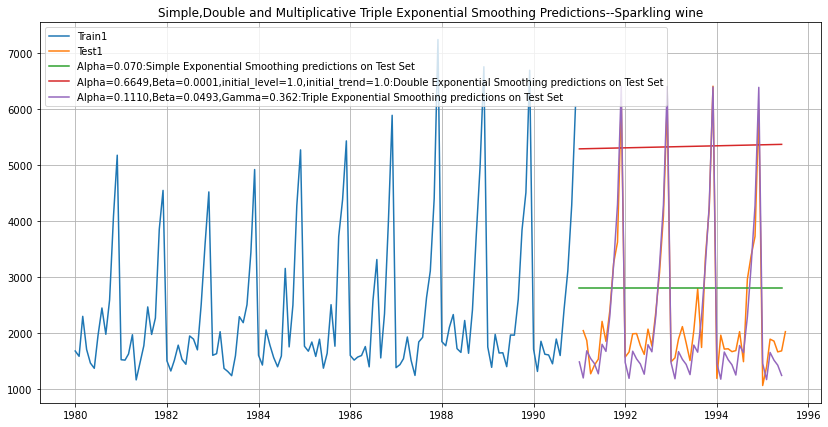

In [98]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train1, label='Train1')
plt.plot(test1, label='Test1')

plt.plot(SES_predict1, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.6649,Beta=0.0001,initial_level=1.0,initial_trend=1.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict1, label='Alpha=0.1110,Beta=0.0493,Gamma=0.362:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Multiplicative Triple Exponential Smoothing Predictions--Sparkling wine');

In [99]:
print('TES RMSE2:',mean_squared_error(test1.values,TES_predict2.values,squared=False))

TES RMSE2: 1448.376990869052


In [100]:
resultsDf_temp2 = pd.DataFrame({'Test RMSE--Sparkling': [mean_squared_error(test1.values,TES_predict2.values,squared=False)]}
                           ,index=['Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp2])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES                                              1344.734375
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991

### Rose Wine Model 1: Build a Linear Regression using the Time Stamped order of rose wine sales

In [101]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [102]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [103]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-02-01  55.0   133
1991-03-01  66.0   134
1991-04-01  65.0   135
1991-05-01  60.0   136
1991-06-01  65.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-01  45.0   182
1995-04-01  52.0   183
1995-05-01  28.0   184
1995-06-01  40.0   185
1995-07-01  62.0   186 



In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr = LinearRegression()

In [106]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [107]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

#### Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [108]:
from sklearn import metrics

In [109]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.370


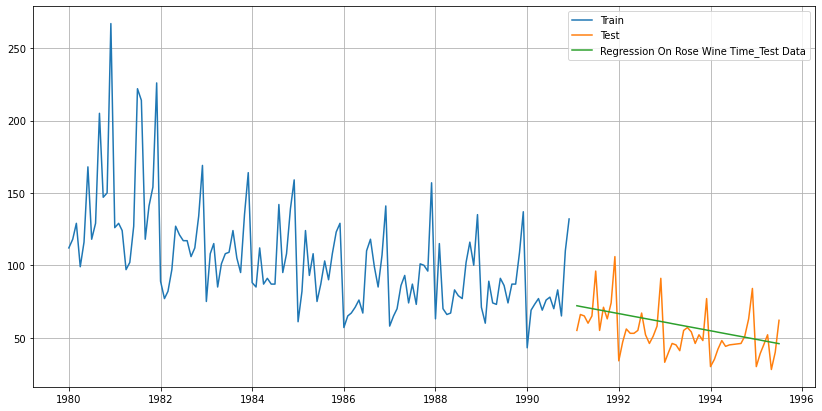

In [110]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Rose Wine Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [111]:
resultsDf_tempLR = pd.DataFrame({'Test RMSE--Rose': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_tempLR])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES                                       36.861106
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500
RegressionOnTime                                      15.369603

### Sparkling Wine Model 1: Build a Linear Regression using the Time Stamped order of sparkling wine sales

In [112]:
train_time1 = [i+1 for i in range(len(train1))]
test_time1 = [i+133 for i in range(len(test1))]
print('Training Time instance','\n',train_time1)
print('Test Time instance','\n',test_time1)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [113]:
LinearRegression_train1 = train1.copy()
LinearRegression_test1 = test1.copy()

In [114]:
LinearRegression_train1['time'] = train_time1
LinearRegression_test1['time'] = test_time1

print('First few rows of Training Data','\n',LinearRegression_train1.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train1.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test1.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test1.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-02-01       2049   133
1991-03-01       1874   134
1991-04-01       1279   135
1991-05-01       1432   136
1991-06-01       1540   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-01       1897   182
1995-04-01       1862   183
1995-05-01       1670   184
1995-06-01       1688   185
1995-07-01       2031   186 



In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lrS = LinearRegression()

In [117]:
lrS.fit(LinearRegression_train1[['time']],LinearRegression_train1['Sparkling'].values)

LinearRegression()

In [118]:
test_predictions_model2         = lrS.predict(LinearRegression_test1[['time']])
LinearRegression_test1['RegOnTime'] = test_predictions_model2

In [119]:
from sklearn import metrics

In [120]:
## Test Data - RMSE

rmse_model1_test1 = metrics.mean_squared_error(test1['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test1))

For RegressionOnTime forecast on the Test Data,  RMSE is 1394.441


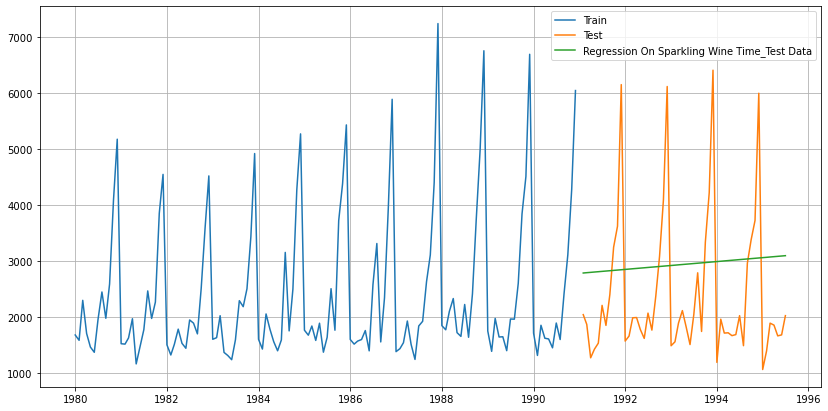

In [121]:
train_predictions_model2         = lrS.predict(LinearRegression_train1[['time']])
LinearRegression_train1['RegOnTime'] = train_predictions_model2

test_predictions_model2         = lrS.predict(LinearRegression_test1[['time']])
LinearRegression_test1['RegOnTime'] = test_predictions_model2

plt.plot( train1['Sparkling'], label='Train')
plt.plot(test1['Sparkling'], label='Test')
plt.plot(LinearRegression_test1['RegOnTime'], label='Regression On Sparkling Wine Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [122]:
resultsDf_tempLRS = pd.DataFrame({'Test RMSE--Sparkling': [rmse_model1_test1]},index=['RegressionOnTime'])
resultsDf1 = pd.concat([resultsDf1, resultsDf_tempLRS])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES                                              1344.734375
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991
RegressionOnTime                                             1394.441182

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

### Rose Wine:

In [123]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [124]:
train.tail()

Rose
Time_Stamp       
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [125]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
1991-06-01    132.0
Name: naive, dtype: float64

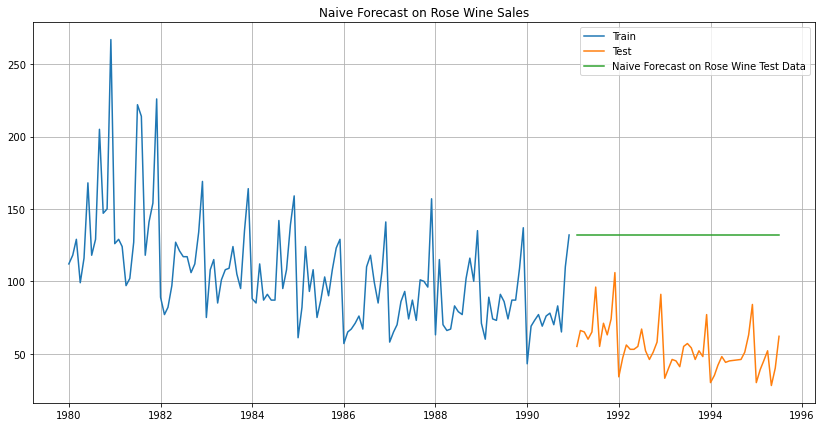

In [126]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Rose Wine Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast on Rose Wine Sales")
plt.grid();

Model Evaluation:

In [127]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.750


In [128]:
resultsDf_2 = pd.DataFrame({'Test RMSE--Rose': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES                                       36.861106
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500
RegressionOnTime                                      15.369603
NaiveModel                                            79.750253

### Sparkling Wine: 

In [129]:
NaiveModel_train1 = train1.copy()
NaiveModel_test1 = test1.copy()

In [130]:
train1.tail()

Sparkling
Time_Stamp           
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [131]:
NaiveModel_test1['naive'] = np.asarray(train1['Sparkling'])[len(np.asarray(train1['Sparkling']))-1]
NaiveModel_test1['naive'].head()

Time_Stamp
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
1991-06-01    6047
Name: naive, dtype: int64

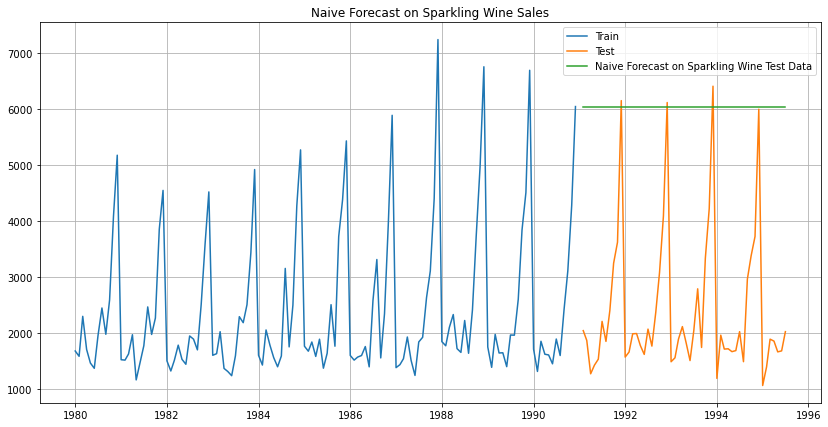

In [132]:
plt.plot(NaiveModel_train1['Sparkling'], label='Train')
plt.plot(test1['Sparkling'], label='Test')

plt.plot(NaiveModel_test1['naive'], label='Naive Forecast on Sparkling Wine Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast on Sparkling Wine Sales")
plt.grid();

In [133]:
rmse_model2_test1 = metrics.mean_squared_error(test1['Sparkling'],NaiveModel_test1['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test1))

For RegressionOnTime forecast on the Test Data,  RMSE is 3858.888


In [134]:
resultsDf_S = pd.DataFrame({'Test RMSE--Sparkling': [rmse_model2_test1]},index=['NaiveModel'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_S])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES                                              1344.734375
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991
RegressionOnTime                                             1394.441182
NaiveModel                                                   3858.888237

### Moving Average Model:

### Rose Wine:

In [135]:
MovingAverage = df2.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [136]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

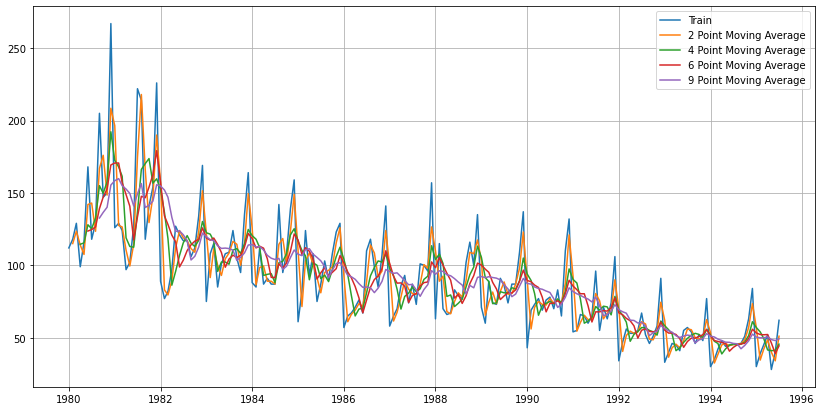

In [137]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

### Train-Test Split

In [138]:
MA_train             = MovingAverage[MovingAverage.index<'1991'] 
MA_test              = MovingAverage[MovingAverage.index>'1991']

In [139]:
MA_train.shape

(132, 5)

In [140]:
MA_test.shape

(54, 5)

In [141]:
MA_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                      
1991-02-01  55.0        54.5       87.75   83.166667   80.333333
1991-03-01  66.0        60.5       76.75   80.333333   79.222222
1991-04-01  65.0        65.5       60.00   80.333333   77.777778
1991-05-01  60.0        62.5       61.50   72.000000   76.666667
1991-06-01  65.0        62.5       64.00   60.833333   74.666667

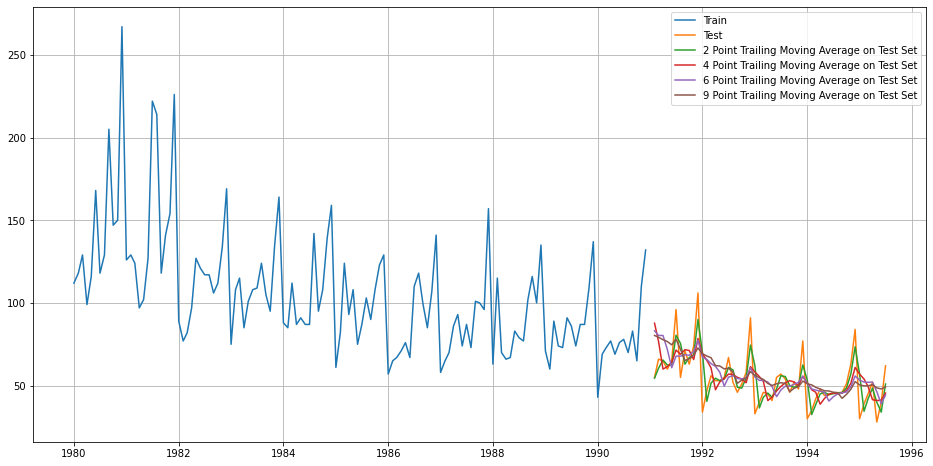

In [142]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MA_train['Rose'], label='Train')
plt.plot(MA_test['Rose'], label='Test')


plt.plot(MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MA_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MA_test['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MA_test['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [143]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],MA_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],MA_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],MA_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],MA_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 10.355
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 13.725
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.055
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.371


In [144]:
resultsDf_4 = pd.DataFrame({'Test RMSE--Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE--Rose
Alpha=0.098,SES                                       36.861106
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500
RegressionOnTime                                      15.369603
NaiveModel                                            79.750253
2pointTrailingMovingAverage                           10.354667
4pointTrailingMovingAverage                           13.725015
6pointTrailingMovingAverage                           14.054791
9pointTrailingMovingAverage                           14.370674

### Moving Average Model For Sparkling Wine:

In [145]:
MovingAverage1 = df1.copy()
MovingAverage1.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [146]:
MovingAverage1['Trailing_2'] = MovingAverage1['Sparkling'].rolling(2).mean()
MovingAverage1['Trailing_4'] = MovingAverage1['Sparkling'].rolling(4).mean()
MovingAverage1['Trailing_6'] = MovingAverage1['Sparkling'].rolling(6).mean()
MovingAverage1['Trailing_9'] = MovingAverage1['Sparkling'].rolling(9).mean()

MovingAverage1.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

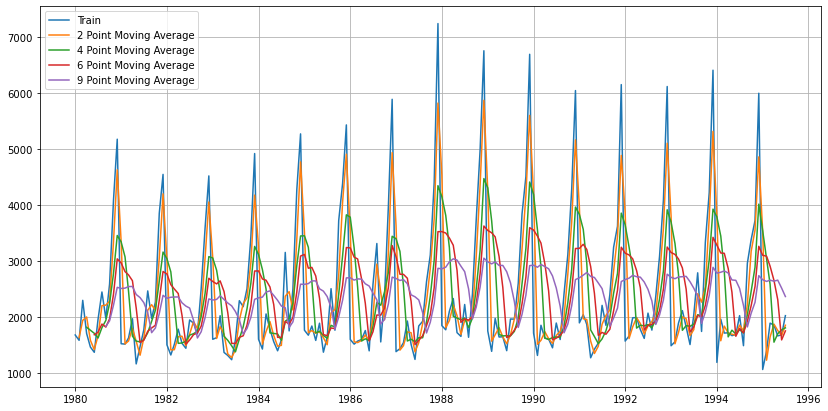

In [147]:
## Plotting on the whole data

plt.plot(MovingAverage1['Sparkling'], label='Train')
plt.plot(MovingAverage1['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage1['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage1['Trailing_6'], label = '6 Point Moving Average')
plt.plot(MovingAverage1['Trailing_9'], label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [148]:
MA_train1             = MovingAverage1[MovingAverage1.index<'1991'] 
MA_test1              = MovingAverage1[MovingAverage1.index>'1991']

In [149]:
MA_test1.shape

(54, 5)

In [150]:
MA_test1.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1991-02-01       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-01       1874      1961.5     2968.00  3212.333333  2800.222222
1991-04-01       1279      1576.5     1776.00  2906.166667  2731.333333
1991-05-01       1432      1355.5     1658.50  2430.500000  2712.111111
1991-06-01       1540      1486.0     1531.25  1679.333333  2613.888889

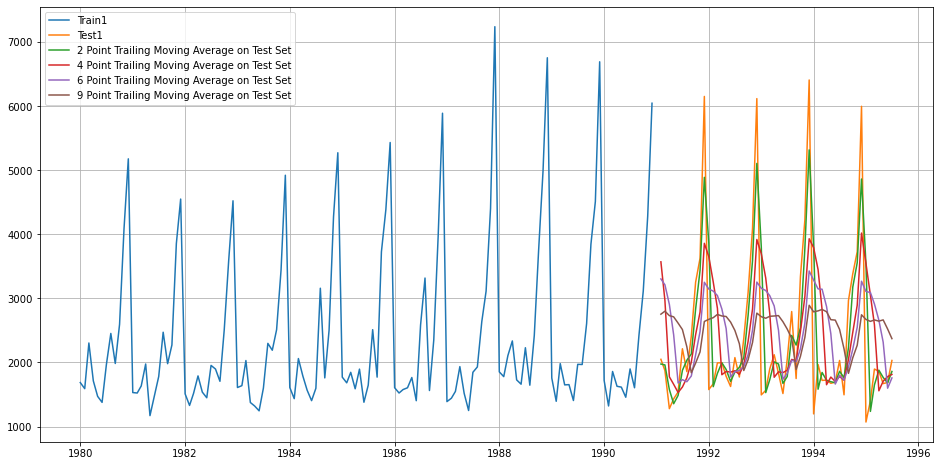

In [151]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MA_train1['Sparkling'], label='Train1')
plt.plot(MA_test1['Sparkling'], label='Test1')


plt.plot(MA_test1['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MA_test1['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MA_test1['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MA_test1['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation:

In [152]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse1_model4_test_2 = metrics.mean_squared_error(test1['Sparkling'],MA_test1['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse1_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse1_model4_test_4 = metrics.mean_squared_error(test1['Sparkling'],MA_test1['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse1_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse1_model4_test_6 = metrics.mean_squared_error(test1['Sparkling'],MA_test1['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse1_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse1_model4_test_9 = metrics.mean_squared_error(test1['Sparkling'],MA_test1['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse1_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 770.929
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1354.278


In [153]:
resultsDf_S = pd.DataFrame({'Test RMSE--Sparkling': [rmse1_model4_test_2,rmse1_model4_test_4
                                          ,rmse1_model4_test_6,rmse1_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_S])
resultsDf1

Test RMSE--Sparkling
Alpha=0.070,SES                                              1344.734375
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991
RegressionOnTime                                             1394.441182
NaiveModel                                                   3858.888237
2pointTrailingMovingAverage                                   770.928742
4pointTrailingMovingAverage                                  1137.137053
6pointTrailingMovingAverage                                  1283.096993
9pointTrailingMovingAverage                                  1354.277938

### Auto Regressive Models:

Lags

Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

White noise of the residuals:

White noise is a process of residuals ϵt

that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.
Auto-Regressive (AR) Models

Auto-Regression is a regression of a variable on itself measured at different time points. Auto-Regressive model with lag 1, AR(1) is given by

    Yt+1=βYt+ϵt+1

and this same as
Yt+1−μ=β(Yt−μ)+ϵt+1
and this same as
where ϵt+1
is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation.

    Yt+1−μ

is interpreted as a deviation from mean value mu

        and known as mean centered series.

The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. The null hypothesis is that time series is non-stationary. Alternative hypothesis is that time series is stationary.



### AR Model indentification

Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)
Autocorrelation Function (ACF)

A plot of auto-correlation of different lags is called ACF.

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.
Partial Autocorrelation Function (PACF)

A plot of partial auto-correlation for different values of lags is called PACF.

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:

    - The partial auto-correlation, |ρpk| > 1.96 /root(n) for first p values and cuts off to zero.
    - The auto-correlation function, ρk decreases exponentially.

The model is AR of order p when the PACF cuts-off after a lag p.

* The model is MA of order p when the ACF cuts-off after a lag q.

* The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

    For an ARIMA (p,d,q) process, it becomes non-stationary to stationary after differencing it for d times.


In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import matplotlib

#### Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at α= 0.05. 
#### If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at α = 0.05.

In [155]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

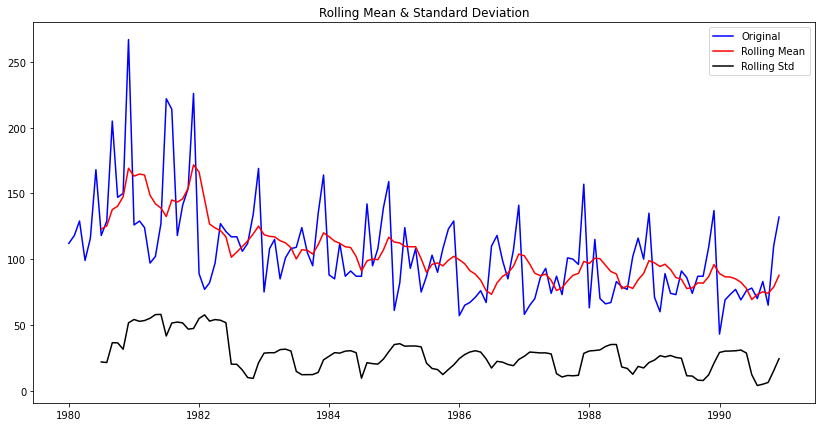

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [156]:
test_stationarity(train['Rose'])

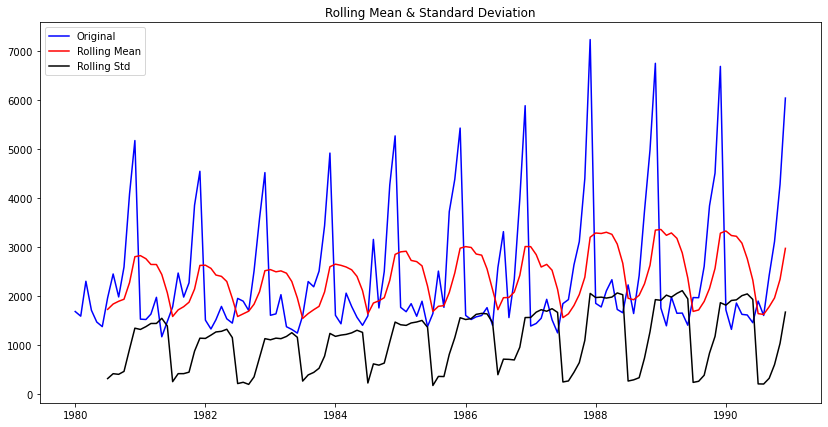

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [157]:
test_stationarity(train1['Sparkling'])

#### P-value for both Rose and Sparkling wine time series data is high and more than 0.05. Thus, we fail to reject null hypothesis. that means both time series data are non-stationary. 

#### Differencing by level (1) to stationarize both time series data Rose and Sparkling wine and again checking for stationarity using Dickey-Fuller Test:

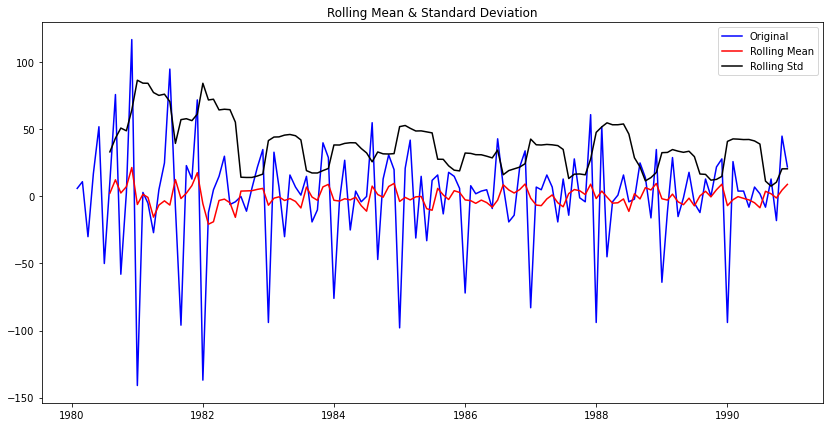

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [158]:
test_stationarity(train.diff().dropna())

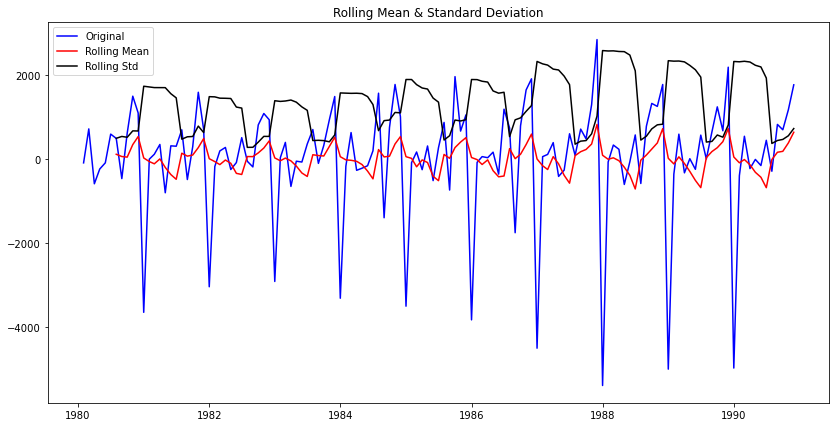

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [159]:
test_stationarity(train1.diff().dropna())

#### After differencing both time series data by level (1), p-value for stationarity hypothesis test is less than 0.05. Thus both time series data are now stationary data.

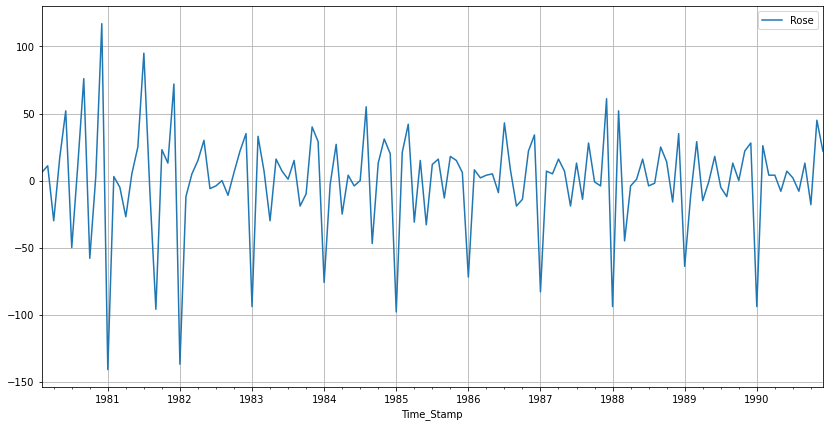

In [160]:
train.diff().dropna().plot(grid=True); #plot of stationary Rose wine training data

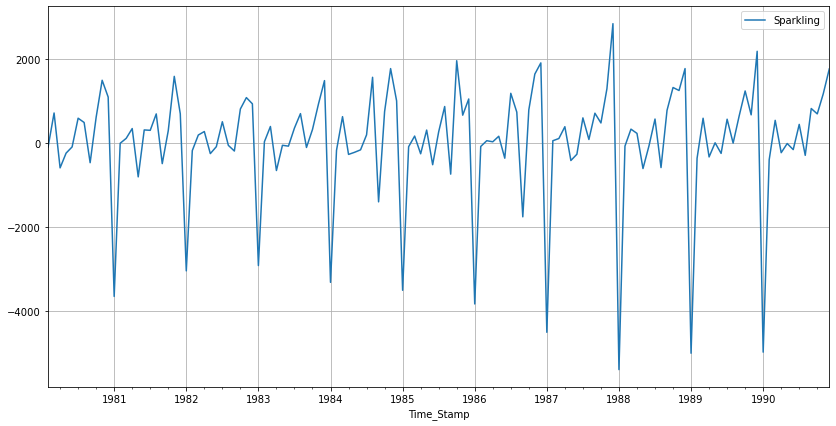

In [161]:
train1.diff().dropna().plot(grid=True); #plot of stationary Sparkling wine training data

In [162]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [163]:
train_diff = train.diff(periods=1).dropna()
train_diff

Rose
Time_Stamp      
1980-02-01   6.0
1980-03-01  11.0
1980-04-01 -30.0
1980-05-01  17.0
1980-06-01  52.0
...          ...
1990-08-01  -8.0
1990-09-01  13.0
1990-10-01 -18.0
1990-11-01  45.0
1990-12-01  22.0

[131 rows x 1 columns]

In [164]:
train1_diff = train1.diff(periods=1).dropna()
train1_diff

Sparkling
Time_Stamp           
1980-02-01      -95.0
1980-03-01      713.0
1980-04-01     -592.0
1980-05-01     -241.0
1980-06-01      -94.0
...               ...
1990-08-01     -294.0
1990-09-01      819.0
1990-10-01      692.0
1990-11-01     1170.0
1990-12-01     1761.0

[131 rows x 1 columns]

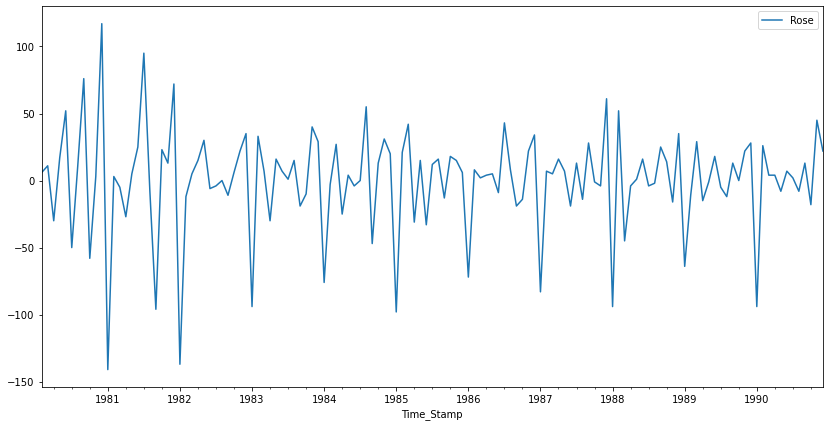

In [165]:
train_diff.plot();

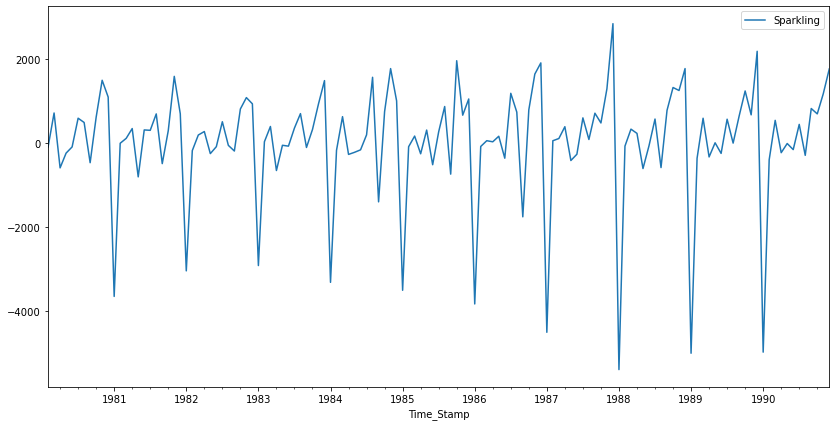

In [166]:
train1_diff.plot();

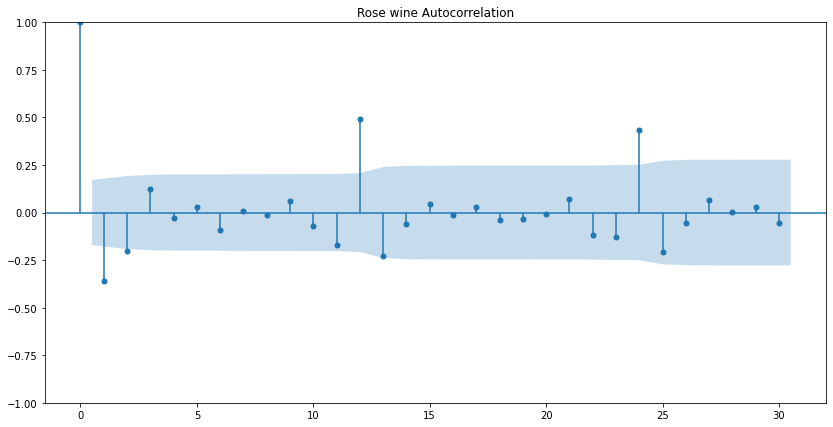

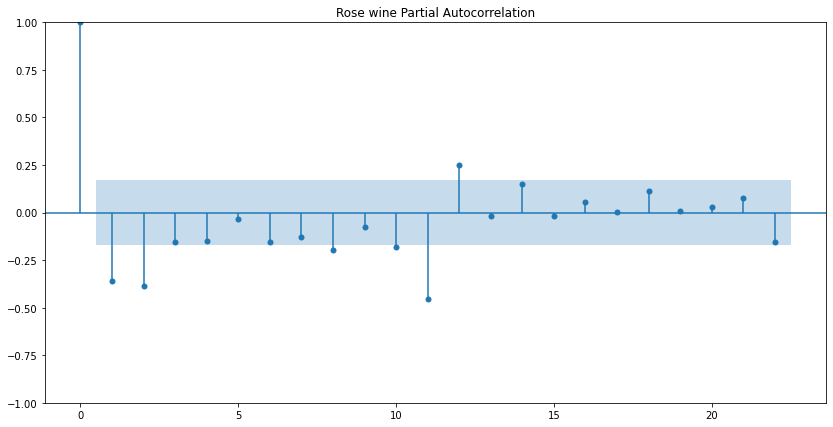

In [167]:
plot_acf(train_diff,lags=30, title='Rose wine Autocorrelation')
plot_pacf(train_diff, title='Rose wine Partial Autocorrelation');

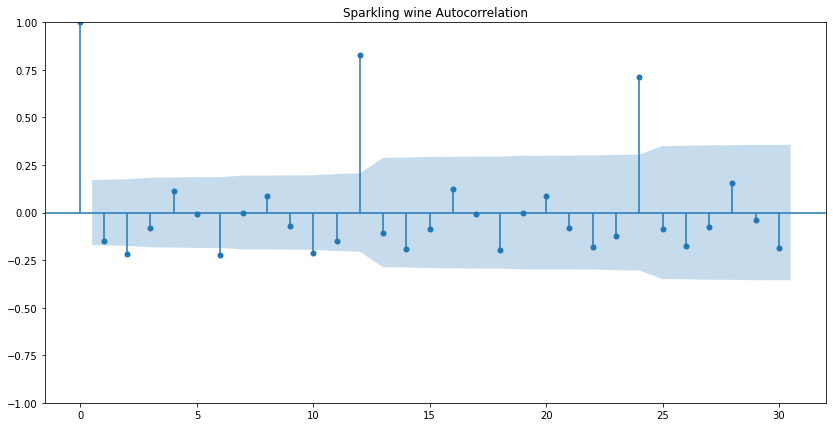

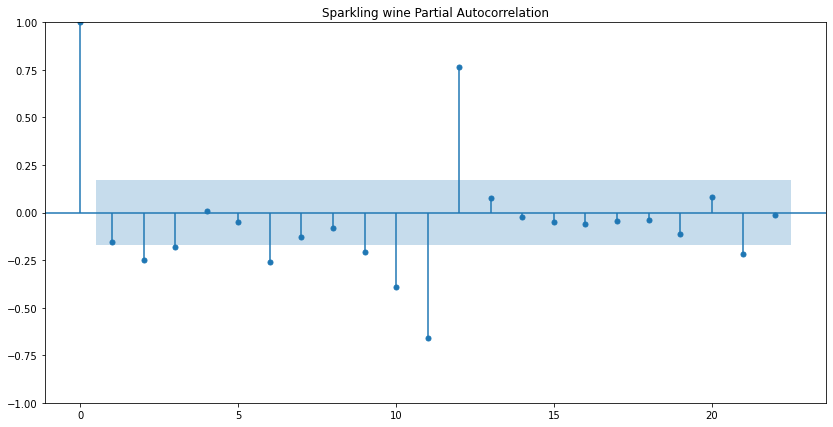

In [168]:
plot_acf(train1_diff,lags=30, title='Sparkling wine Autocorrelation')
plot_pacf(train1_diff, title='Sparkling wine Partial Autocorrelation');

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [169]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [170]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

### For Rose Wine:

In [171]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748333
ARIMA(0, 1, 2) - AIC:1279.671528853574
ARIMA(0, 1, 3) - AIC:1280.5453761734666
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380066
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223309975
ARIMA(2, 1, 0) - AIC:1298.6110341604885
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.870722226405
ARIMA(2, 1, 3) - AIC:1274.695120619967
ARIMA(3, 1, 0) - AIC:1297.4810917271716
ARIMA(3, 1, 1) - AIC:1282.4192776271846
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6595356562773


In [172]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695121
15  (3, 1, 3)  1278.659536
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [173]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 20 Mar 2022   AIC                           1274.695
Time:                        15:03:38   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6777      0.084    -20.037      0.000      -1.842      -1.514
ar.L2         -0.7285      0.084     -8.701      0.000      -0.893      -0.564
ma.L1          1.0445      0.650      1.606      0.1

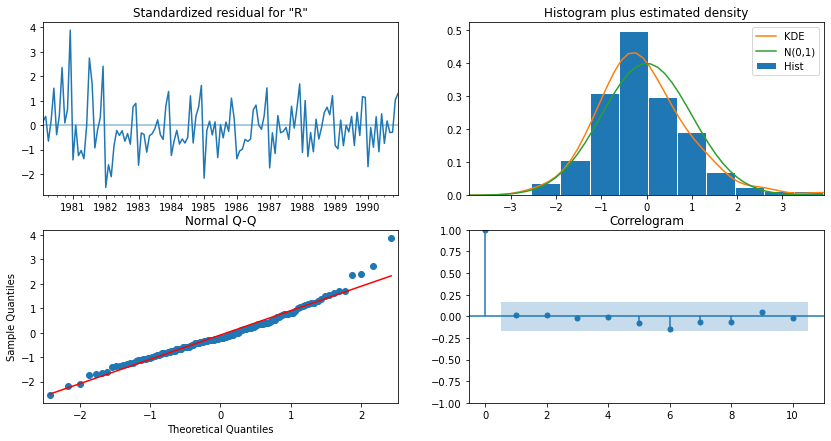

In [174]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [175]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [176]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [177]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.71697159991243 
MAPE: 76.82779514571425


In [178]:
resultsDf_arima = pd.DataFrame({'Test RMSE--Rose': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_arima])
resultsDf

Test RMSE--Rose       MAPE
Alpha=0.098,SES                                       36.861106        NaN
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605        NaN
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218        NaN
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500        NaN
RegressionOnTime                                      15.369603        NaN
NaiveModel                                            79.750253        NaN
2pointTrailingMovingAverage                           10.354667        NaN
4pointTrailingMovingAverage                           13.725015        NaN
6pointTrailingMovingAverage                           14.054791        NaN
9pointTrailingMovingAverage                           14.370674        NaN
ARIMA(2,1,3)                                          36.716972  76.827795

### For Sparkling Wine:

In [179]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model1 = ARIMA(train1['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA1{} - AIC1:{}'.format(param,ARIMA_model1.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param1':param, 'AIC1': ARIMA_model1.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA1(0, 1, 0) - AIC1:2267.6630357855465
ARIMA1(0, 1, 1) - AIC1:2263.0600155918555
ARIMA1(0, 1, 2) - AIC1:2234.408323131469
ARIMA1(0, 1, 3) - AIC1:2233.994857753184
ARIMA1(1, 1, 0) - AIC1:2266.6085393190097
ARIMA1(1, 1, 1) - AIC1:2235.755094664003
ARIMA1(1, 1, 2) - AIC1:2234.5272004520434
ARIMA1(1, 1, 3) - AIC1:2235.607816266148
ARIMA1(2, 1, 0) - AIC1:2260.36574396809
ARIMA1(2, 1, 1) - AIC1:2233.777626242348
ARIMA1(2, 1, 2) - AIC1:2213.5092126178606
ARIMA1(2, 1, 3) - AIC1:2232.90109907355
ARIMA1(3, 1, 0) - AIC1:2257.72337899794
ARIMA1(3, 1, 1) - AIC1:2235.4990027809445
ARIMA1(3, 1, 2) - AIC1:2230.7690887299937
ARIMA1(3, 1, 3) - AIC1:2221.4520785907253


In [180]:
ARIMA_AIC.sort_values(by='AIC1',ascending=True).head()

param  AIC         AIC1     param1
26   NaN  NaN  2213.509213  (2, 1, 2)
31   NaN  NaN  2221.452079  (3, 1, 3)
30   NaN  NaN  2230.769089  (3, 1, 2)
27   NaN  NaN  2232.901099  (2, 1, 3)
25   NaN  NaN  2233.777626  (2, 1, 1)

In [181]:
auto_ARIMA1 = ARIMA(train1, order=(2,1,2))

results_auto_ARIMA1 = auto_ARIMA1.fit()

print(results_auto_ARIMA1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 20 Mar 2022   AIC                           2213.509
Time:                        15:03:45   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.214      0.0

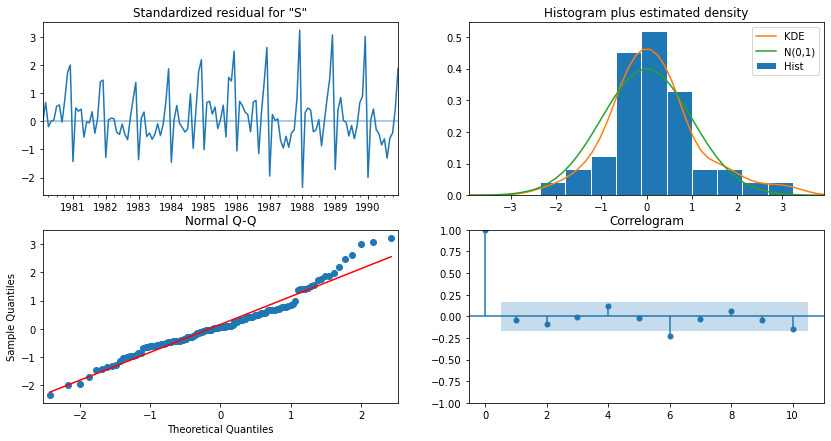

In [182]:
results_auto_ARIMA1.plot_diagnostics();

In [183]:
predicted_auto_ARIMA1 = results_auto_ARIMA1.forecast(steps=len(test1))

In [184]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [185]:
rmse = mean_squared_error(test1['Sparkling'],predicted_auto_ARIMA1,squared=False)
mape = mean_absolute_percentage_error(test1['Sparkling'],predicted_auto_ARIMA1)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1307.7756796603244 
MAPE: 45.93104214013514


In [186]:
resultsDf1_arima = pd.DataFrame({'Test RMSE--Sparkling': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf1 = pd.concat([resultsDf1, resultsDf1_arima])
resultsDf1

Test RMSE--Sparkling  \
Alpha=0.070,SES                                              1344.734375   
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577   
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106   
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991   
RegressionOnTime                                             1394.441182   
NaiveModel                                                   3858.888237   
2pointTrailingMovingAverage                                   770.928742   
4pointTrailingMovingAverage                                  1137.137053   
6pointTrailingMovingAverage                                  1283.096993   
9pointTrailingMovingAverage                                  1354.277938   
ARIMA(2,1,2)                                                 1307.775680   

                                                         MAPE  
Alpha=0.070,SES                                           NaN  
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...        NaN  
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add             NaN  
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul              NaN  
RegressionOnTime                                          NaN  
NaiveModel                                                NaN  
2pointTrailingMovingAverage                               NaN  
4pointTrailingMovingAverage                               NaN  
6pointTrailingMovingAverage                               NaN  
9pointTrailingMovingAverage                               NaN  
ARIMA(2,1,2)                                        45.931042

#### Refering to the ACF and PACF plots of Rose wine: 


   - The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
   - The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

- By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [187]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 20 Mar 2022   AIC                           1281.871
Time:                        15:03:47   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

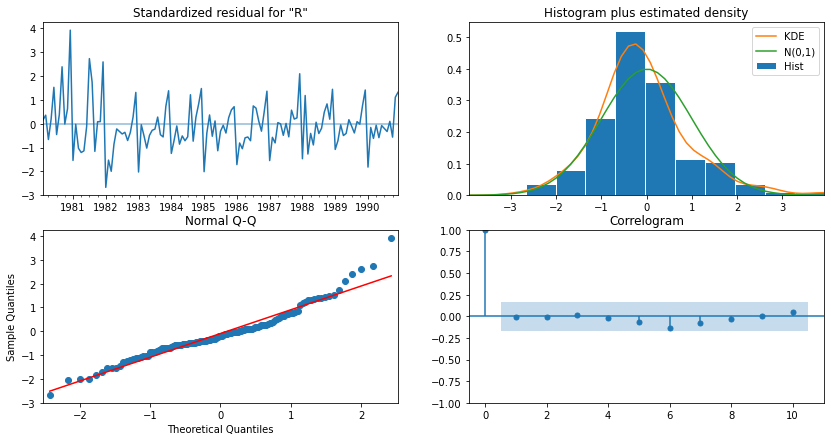

In [188]:
results_manual_ARIMA.plot_diagnostics();

In [189]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [190]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.94593860889096 
MAPE: 76.86296106037092


In [191]:
temp_resultsDf = pd.DataFrame({'Test RMSE--Rose': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE--Rose       MAPE
Alpha=0.098,SES                                       36.861106        NaN
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605        NaN
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218        NaN
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500        NaN
RegressionOnTime                                      15.369603        NaN
NaiveModel                                            79.750253        NaN
2pointTrailingMovingAverage                           10.354667        NaN
4pointTrailingMovingAverage                           13.725015        NaN
6pointTrailingMovingAverage                           14.054791        NaN
9pointTrailingMovingAverage                           14.370674        NaN
ARIMA(2,1,3)                                          36.716972  76.827795
ARIMA(2,1,2)                                          36.945939  76.862961

#### Refering to the ACF and PACF plots of Sparkling wine: 


   - The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
   - The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

- By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [192]:
manual_ARIMA1 = ARIMA(train1['Sparkling'], order=(2,1,2))

results_manual_ARIMA1 = manual_ARIMA1.fit()

print(results_manual_ARIMA1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 20 Mar 2022   AIC                           2213.509
Time:                        15:03:49   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.214      0.0

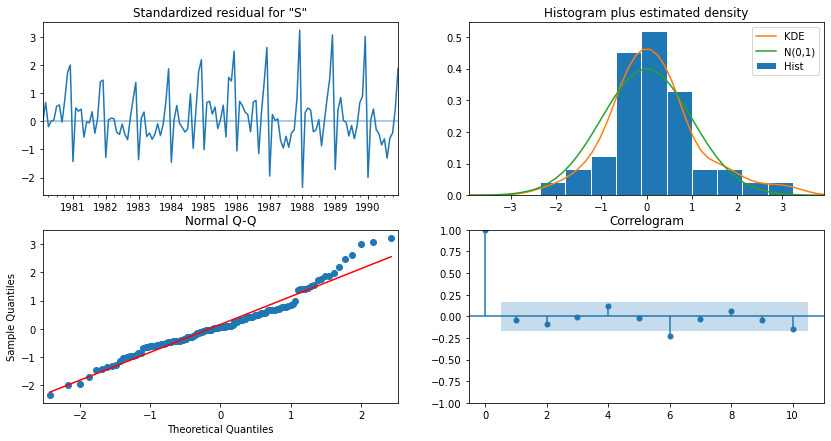

In [193]:
results_manual_ARIMA1.plot_diagnostics();

In [194]:
predicted_manual_ARIMA1 = results_manual_ARIMA1.forecast(steps=len(test1))

In [195]:
rmse1 = mean_squared_error(test1['Sparkling'],predicted_manual_ARIMA1,squared=False)
mape1 = mean_absolute_percentage_error(test1['Sparkling'],predicted_manual_ARIMA1)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1307.7756796603244 
MAPE: 45.93104214013514


In [196]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE--Sparkling': rmse1,'MAPE':mape1}
                           ,index=['ARIMA(2,1,2)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf1])

resultsDf1

Test RMSE--Sparkling  \
Alpha=0.070,SES                                              1344.734375   
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577   
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106   
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991   
RegressionOnTime                                             1394.441182   
NaiveModel                                                   3858.888237   
2pointTrailingMovingAverage                                   770.928742   
4pointTrailingMovingAverage                                  1137.137053   
6pointTrailingMovingAverage                                  1283.096993   
9pointTrailingMovingAverage                                  1354.277938   
ARIMA(2,1,2)                                                 1307.775680   
ARIMA(2,1,2)                                                 1307.775680   

                                                         MAPE  
Alpha=0.070,SES                                           NaN  
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...        NaN  
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add             NaN  
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul              NaN  
RegressionOnTime                                          NaN  
NaiveModel                                                NaN  
2pointTrailingMovingAverage                               NaN  
4pointTrailingMovingAverage                               NaN  
6pointTrailingMovingAverage                               NaN  
9pointTrailingMovingAverage                               NaN  
ARIMA(2,1,2)                                        45.931042  
ARIMA(2,1,2)                                        45.931042

### Manual SARIMA Model for Rose Wine:

In [197]:
train_diff6 = train.diff(periods=6).dropna()
train_diff6

Rose
Time_Stamp      
1980-07-01   6.0
1980-08-01  11.0
1980-09-01  76.0
1980-10-01  48.0
1980-11-01  34.0
...          ...
1990-08-01   1.0
1990-09-01  10.0
1990-10-01 -12.0
1990-11-01  41.0
1990-12-01  56.0

[126 rows x 1 columns]

In [198]:
train1_diff6 = train1.diff(periods=6).dropna()
train1_diff6

Sparkling
Time_Stamp           
1980-07-01      280.0
1980-08-01      862.0
1980-09-01     -320.0
1980-10-01      884.0
1980-11-01     2616.0
...               ...
1990-08-01      284.0
1990-09-01      565.0
1990-10-01     1488.0
1990-11-01     2671.0
1990-12-01     4590.0

[126 rows x 1 columns]

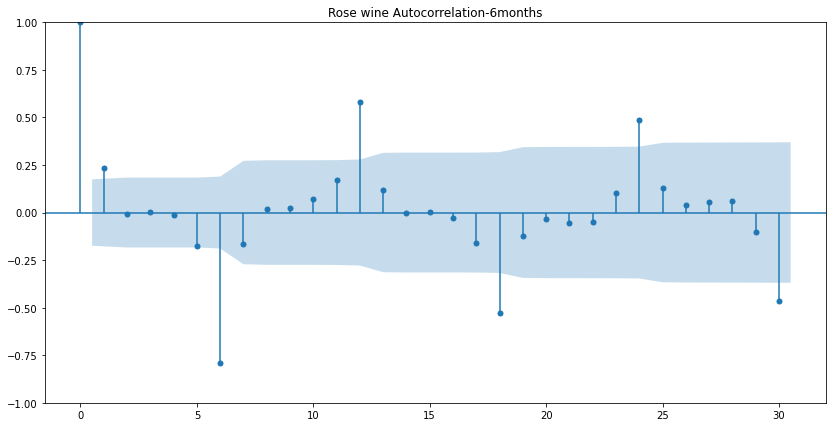

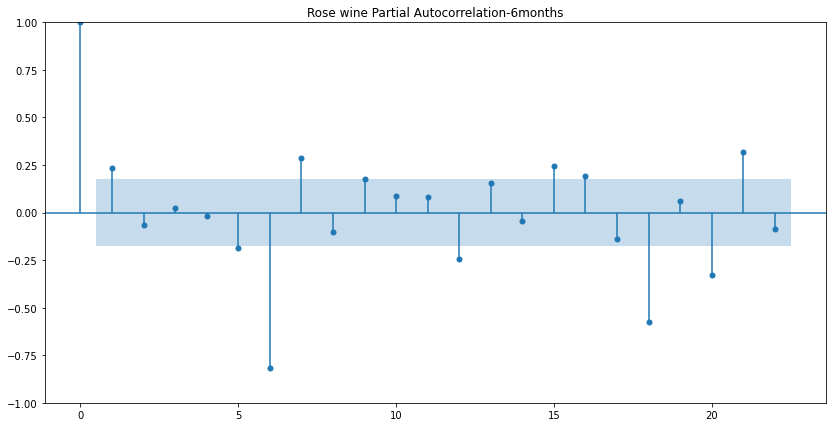

In [199]:
plot_acf(train_diff6,lags=30, title='Rose wine Autocorrelation-6months')
plot_pacf(train_diff6, title='Rose wine Partial Autocorrelation-6months');

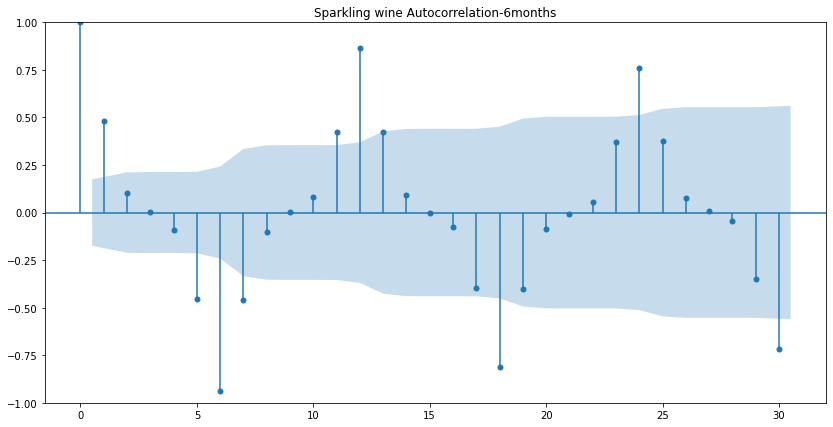

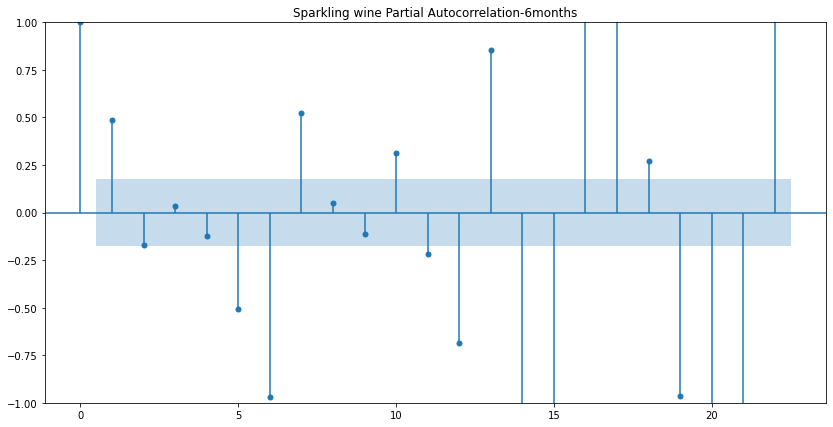

In [200]:
plot_acf(train1_diff6,lags=30, title='Sparkling wine Autocorrelation-6months')
plot_pacf(train1_diff6, title='Sparkling wine Partial Autocorrelation-6months');

In [201]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 9, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                                  SARIMAX Results                                                  
Dep. Variable:                                                        Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9], 6)   Log Likelihood                -282.910
Date:                                                     Sun, 20 Mar 2022   AIC                            597.821
Time:                                                             15:05:11   BIC                            633.333
Sample:                                                         01-01-1980   HQIC                           611.892
                                                              - 12-01-1990                                         
Covariance Type:                                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      

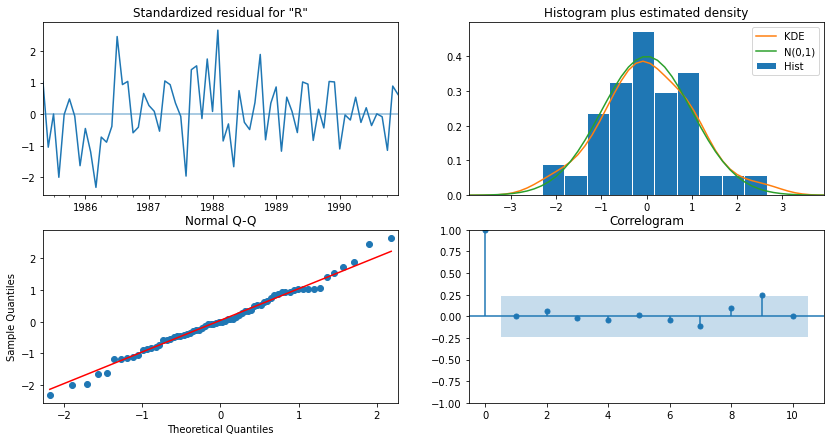

In [202]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [217]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
results_manual_SARIMA

In [204]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 28.524310373171534 
MAPE: 39.62179924055165


In [205]:
temp_resultsDf = pd.DataFrame({'Test RMSE--Rose': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(2,1,9,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE--Rose       MAPE
Alpha=0.098,SES                                       36.861106        NaN
Alpha=1.4e-8,Beta=7.3e-9:DES                          15.369605        NaN
Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:TES-Add         27.110218        NaN
Alpha=0.0498,Beta=0.0406,Gamma=0.00078:TES-Mul        29.530500        NaN
RegressionOnTime                                      15.369603        NaN
NaiveModel                                            79.750253        NaN
2pointTrailingMovingAverage                           10.354667        NaN
4pointTrailingMovingAverage                           13.725015        NaN
6pointTrailingMovingAverage                           14.054791        NaN
9pointTrailingMovingAverage                           14.370674        NaN
ARIMA(2,1,3)                                          36.716972  76.827795
ARIMA(2,1,2)                                          36.945939  76.862961
SARIMA(2,1,2)(2,1,9,6)                                28.524310  39.621799

### Manual SARIMA for Sparkling Wine:

In [206]:
import statsmodels.api as sm

manual_SARIMA1 = sm.tsa.statespace.SARIMAX(train1['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA1.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -770.858
Date:                                   Sun, 20 Mar 2022   AIC                           1559.716
Time:                                           15:05:22   BIC                           1583.515
Sample:                                       01-01-1980   HQIC                          1569.358
                                            - 12-01-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7171      0.270     -2.659      0.008    

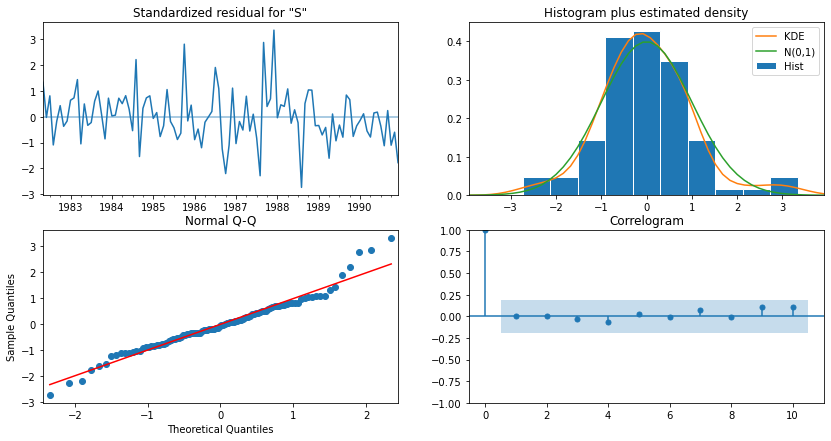

In [207]:
results_manual_SARIMA1.plot_diagnostics()
plt.show()

In [208]:
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(test1))

In [209]:
rmse1 = mean_squared_error(test1['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(test1['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1765.8648401908697 
MAPE: 34.29255849345827


In [210]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE--Sparkling': [rmse1],'MAPE':mape1}
                           ,index=['SARIMA(2,1,2)(1,1,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf1])

resultsDf1

Test RMSE--Sparkling  \
Alpha=0.070,SES                                              1344.734375   
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...           3193.863577   
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add                1575.981106   
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul                 1448.376991   
RegressionOnTime                                             1394.441182   
NaiveModel                                                   3858.888237   
2pointTrailingMovingAverage                                   770.928742   
4pointTrailingMovingAverage                                  1137.137053   
6pointTrailingMovingAverage                                  1283.096993   
9pointTrailingMovingAverage                                  1354.277938   
ARIMA(2,1,2)                                                 1307.775680   
ARIMA(2,1,2)                                                 1307.775680   
SARIMA(2,1,2)(1,1,3,6)                                       1765.864840   

                                                         MAPE  
Alpha=0.070,SES                                           NaN  
Alpha=0.6649,Beta=0.0001,initial_level=1.0,init...        NaN  
Alpha=0.1112,Beta=0.0123,Gamma=0.4607:TES-Add             NaN  
Alpha=0.1110,Beta=0.0493,Gamma=0.362:TES-Mul              NaN  
RegressionOnTime                                          NaN  
NaiveModel                                                NaN  
2pointTrailingMovingAverage                               NaN  
4pointTrailingMovingAverage                               NaN  
6pointTrailingMovingAverage                               NaN  
9pointTrailingMovingAverage                               NaN  
ARIMA(2,1,2)                                        45.931042  
ARIMA(2,1,2)                                        45.931042  
SARIMA(2,1,2)(1,1,3,6)                              34.292558

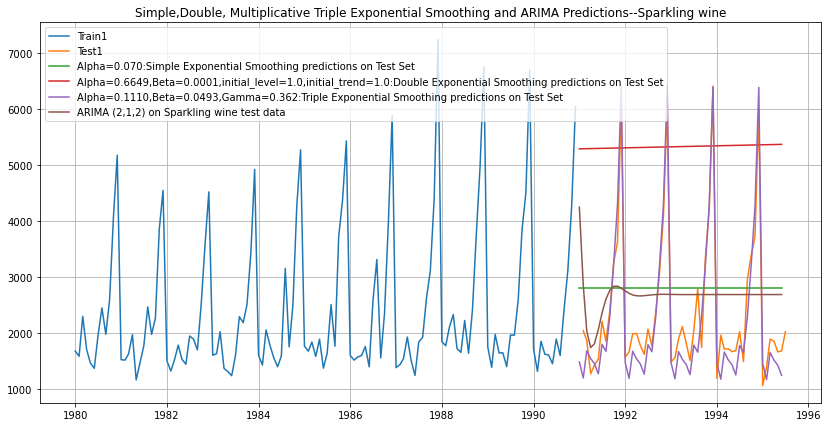

In [213]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train1, label='Train1')
plt.plot(test1, label='Test1')

plt.plot(SES_predict1, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.6649,Beta=0.0001,initial_level=1.0,initial_trend=1.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict1, label='Alpha=0.1110,Beta=0.0493,Gamma=0.362:Triple Exponential Smoothing predictions on Test Set')
plt.plot(predicted_manual_ARIMA1, label='ARIMA (2,1,2) on Sparkling wine test data')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double, Multiplicative Triple Exponential Smoothing and ARIMA Predictions--Sparkling wine');

### Build a model on the whole data using the parameters got from best fit:

#### Based on the model-building exercise, Additive trend and seasonality Triple exponential smoothing is found to be optimum on Rose wine data.
#### Based on the model-building exercise, Multiplicative trend and seasonality Triple exponential smoothing is found to be optimum on Sparkling wine data.

### Rose wine time series:

In [218]:
# Initializing the Double Exponential Smoothing Model
model_TESF = ExponentialSmoothing(df2,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TESF = model_TESF.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TESF.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10004205357726026, 'smoothing_trend': 0.005460931332325488, 'smoothing_seasonal': 0.002369189635224424, 'damping_trend': nan, 'initial_level': 146.15301435958608, 'initial_trend': -0.5547071735515288, 'initial_seasons': array([-27.99255907, -17.21137823,  -9.15141909, -15.79697167,
       -11.86552002,  -5.86732672,   5.30883239,   5.42478795,
         2.77609689,   2.057545  ,  17.1829741 ,  55.90232469]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [230]:
# Forecasting using this model for the duration of the test set
TES_predictF =  model_TESF.forecast(steps=12)
TES_predictF

1995-08-01    50.123621
1995-09-01    46.952806
1995-10-01    45.709683
1995-11-01    60.308535
1995-12-01    98.500361
1996-01-01    14.085685
1996-02-01    24.343326
1996-03-01    31.877575
1996-04-01    24.708757
1996-05-01    28.108126
1996-06-01    33.580485
1996-07-01    44.200468
Freq: MS, dtype: float64

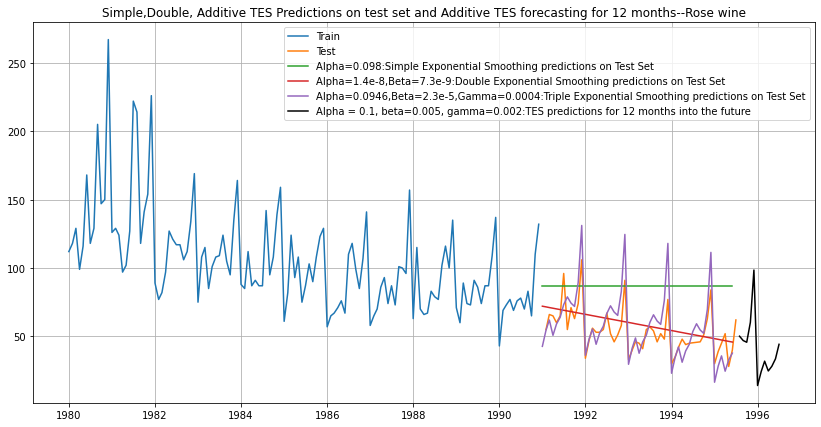

In [231]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.4e-8,Beta=7.3e-9:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0946,Beta=2.3e-5,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predictF, color='black', label='Alpha = 0.1, beta=0.005, gamma=0.002:TES predictions for 12 months into the future')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double, Additive TES Predictions on test set and Additive TES forecasting for 12 months--Rose wine');

### Sparkling Wine Time series data:

In [234]:
# Initializing the Double Exponential Smoothing Model
model_TESF1 = ExponentialSmoothing(df1,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TESF1 = model_TESF1.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TESF1.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571438289575633, 'smoothing_trend': 0.06489803620856302, 'smoothing_seasonal': 0.27386245139667903, 'damping_trend': nan, 'initial_level': 2356.5417612358638, 'initial_trend': 0.9992690616626756, 'initial_seasons': array([0.71400659, 0.67506094, 0.8554648 , 0.78608912, 0.66648384,
       0.64865298, 0.8394058 , 1.06279775, 0.8946804 , 1.1683965 ,
       1.81469001, 2.34234013]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [235]:
# Forecasting using this model for the duration of the test set
TES_predictF1 =  model_TESF1.forecast(steps=12)
TES_predictF1

1995-08-01    1934.374456
1995-09-01    2354.471507
1995-10-01    3182.615708
1995-11-01    3922.288284
1995-12-01    5991.347796
1996-01-01    1358.902328
1996-02-01    1600.746579
1996-03-01    1831.938577
1996-04-01    1792.725979
1996-05-01    1643.529843
1996-06-01    1557.747541
1996-07-01    1968.016093
Freq: MS, dtype: float64

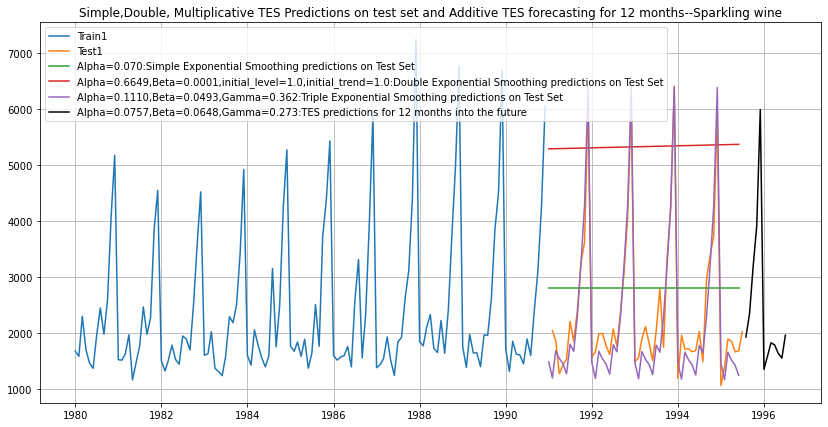

In [237]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train1, label='Train1')
plt.plot(test1, label='Test1')

plt.plot(SES_predict1, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict1, label='Alpha=0.6649,Beta=0.0001,initial_level=1.0,initial_trend=1.0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict1, label='Alpha=0.1110,Beta=0.0493,Gamma=0.362:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predictF1, color='black', 
         label='Alpha=0.0757,Beta=0.0648,Gamma=0.273:TES predictions for 12 months into the future')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double, Multiplicative TES Predictions on test set and Additive TES forecasting for 12 months--Sparkling wine');